<FONT size="5.9pt"> **(2) SPIRALGORITHM: LCA SCNENARIO ANALYSIS**
</FONT> 

This Jupyter notebook shows how the **anaerobic digestion, combined heat and power plant, and nitrogen recovery (AD-CHP-Nrec) model** is combined with the SpiralG biorefinery model to perform a scenario analysis.

The lca_algebraic library was used to build the parameterised database. See below for more information:
- https://oie-mines-paristech.github.io/lca_algebraic/doc/index.html
- https://github.com/oie-mines-paristech/lca_algebraic/blob/master/example-notebook.ipynb

## 1. Initialisation

### 1.1. Set up the directories

In [1]:
import os
import sys

# Set up the directory in which the modules to be loaded are saved
mdir1 = '/home/leabraud/Documents/spiralgorithm/lca_calc'
mdir2 = '/home/leabraud/Documents/spiralgorithm/anadig_model'
mdir3 = '/home/leabraud/Documents/spiralgorithm/bioref2lca'

for mdir in [mdir1, mdir2, mdir3]:
    if mdir not in sys.path:
        sys.path.insert(0,mdir)
        
# Set up the working directory in which the results will be saved
wdir = '/home/leabraud/Documents/LCASpiralg_AD'

# Set directory for Excel files with the information regarding the ecoinvent 3.6 datasets to be used
ddir = '/home/leabraud/Documents/spiralgorithm/datasets'

# Set up the recipe directory in which the recipes for each figure are saved
rdir = '/home/leabraud/Documents/LCASpiralg_AD/recipes'

# Set up the directory to store the results 
resdir = '/home/leabraud/Documents/LCASpiralg_AD/results'

### 1.2. Select or create a brightway project

In [2]:
from master import prep_dir, import_databases, run

recipe = prep_dir (wdir = wdir, rdir = rdir, recipe_name = 'recipe_fig2.yml')
recipe = import_databases (recipe, wdir)


 --------------
| SPIRALGORITHM |
 --------------


> PREPARATION:
  ------------
Working directory: /home/leabraud/Documents/LCASpiralg_AD
Project directory: /home/leabraud/Documents/LCASpiralg_AD/projects
Recipe directory: /home/leabraud/Documents/LCASpiralg_AD/recipes


> INITIATE LCA ANALYSIS:
  ----------------------
Using environment variable BRIGHTWAY2_DIR for data directory:
/home/leabraud/Documents/LCASpiralg_AD/projects

>>> BW2 PROJECT:

Current project directory: /home/leabraud/Documents/LCASpiralg_AD/projects/default.c21f969b5f03d33d43e04f8f136e7682 
Brightway2 projects manager with 4 objects:
	LCASpiralg_AD_feb24
	default
	lcaspiralgAD
	spiralg
Use `projects.report()` to get a report on all projects.
Create a new project? y/[n]: lcaspiralgAD
Choose a working project [default]: lcaspiralgAD

Current project: lcaspiralgAD

>>> IMPORT BIOSPHERE 3:

biosphere3 has already been imported in the project.

>>> IMPORT ECOINVENT 3.6:

/home/leabraud/Documents/LCASpiralg_AD/databas

FileNotFoundError: [Errno 2] No such file or directory: '/home/leabraud/Documents/LCASpiralg_AD/databases/db_transport_S12tech_1.bw2package'

In [3]:
import brightway2 as bw
import lca_algebraic as alg

db_param = 'db_S1234_tech2_PARAM'

# can deleted the initial database that was used to create db_S1234_tech2
if 'db_S123tech_2' in bw.databases: del bw.databases['db_S123tech_2']
    
# deleted the parameterised database if already there
if 'db_S1234_tech2_PARAM' in bw.databases: del bw.databases['db_S1234_tech2_PARAM']
    
# check the databases in the project
alg.list_databases()

,backend,type
name,,
biosphere3,sqlite,background
ecoinvent_3.6_cutoff,sqlite,background
db_S1234_tech2,sqlite,foreground


### 1.3. Copy the foreground activities into a new database 

In [4]:
if db_param in bw.databases:
    del bw.databases[db_param]

alg.resetDb(db_param)
alg.resetParams()

alg.list_databases()


for act in bw.Database('db_S1234_tech2'):
    # copy all the activities 
    act_PARAM = alg.copyActivity(db_param, act, act['name'])
        
# check that the database was created
alg.list_databases()

# check that the activities were copied
act_list = [act['name'] for act in bw.Database(db_param)]
print(', '.join(map(str, act_list)))

S1A3Dewatering, S2A7aPackaging, S4A2ElecCHP, S2A5Ultrafiltration2, S1A4Shaping, S4A0GrassSillageProd, S4A5CitricAcidProd, model_heat_CHP_subst, Hydrogen sulfide # asTech, S2A7cPackaging, model_Ncitr_subst, S1A8Transport, S2A6Concentration, Methane, non-fossil # asTech, model_heat_CHP_alloc, Nitrogen oxides # asTech, S3A1Extraction, model_Nsulf_subst, S1A6Packaging, Carbon dioxide, non-fossil # asTech, S1A0Building, S2A3Filtration, S1A0Operation, S3A5Packaging, S4A4Dewatering, S1A2Filtration, NMVOC, non-methane volatile organic compounds, unspecified origin # asTech, S3A3Ultrafiltration, model_Ncitr_alloc, Platinum # asTech, S4A0CattleSlurryStorage, S1A5Drying, model_Nsulf_alloc, S2A7bPackaging, S3A6STabilisation, S3A4Concentration, S2A1Maceration, S4A3SLseparation, S4A5NitrogenRecSulf, S4A2HeatCHP, S3A2Diafiltration, Sulfur dioxide # asTech, Ammonia # asTech, Carbon monoxide, non-fossil # asTech, S1A1Cultivation, model_elec_CHP_alloc, S2A4Ultrafiltration1, S2A2Centrifugation, S23A8Tran

In [5]:
# Check that the names were added for all exchanges in the foreground activities
for act in bw.Database(db_param):
    print('\nActivity: %s' %act)
    for exc in act.exchanges():
        print('Exchange type: %s, name: %s' %(exc['type'], exc['name']))


Activity: 'S4A5NitrogenRecSulf' (kg, GLO, None)
Exchange type: technosphere, name: sulfuric acid production
Exchange type: technosphere, name: tap water production, underground water without treatment

Activity: 'Ammonia # asTech' (kilogram, GLO, None)
Exchange type: biosphere, name: Ammonia

Activity: 'S4A1BiogasAD' (cubic meter, CH, None)
Exchange type: technosphere, name: anaerobic digestion plant, agriculture, with methane recovery
Exchange type: production, name: biogas
Exchange type: technosphere, name: manure, liquid, swine
Exchange type: technosphere, name: heat, central or small-scale, other than natural gas
Exchange type: technosphere, name: manure, liquid, cattle
Exchange type: technosphere, name: electricity, low voltage
Exchange type: technosphere, name: manure, solid, cattle
Exchange type: technosphere, name: digester sludge
Exchange type: biosphere, name: Dinitrogen monoxide
Exchange type: biosphere, name: Hydrogen sulfide
Exchange type: biosphere, name: Ammonia
Exchang

## 2. Overview of the parameters and mitigation strategies

List of parameters (and switch): 
- **elec_S1_operation**: grid_IT, elec_CHP_alloc, elec_CHP_subst, PV_IT, elec_CHP_no_burdens
- **elec_S1_drying**: grit_IT, elec_CHP, PV_IT, elec_CHP_no_burdens
- **elec_S1_rest (i.e. excluding drying)**: grid_IT, elec_CHP, elec_CHP_no_burdens, PV_IT
- **elec_S23**: grid_FR, elec_CHP, elec_CHP_no_burdens, PV_IT
- **heat_S1_drying**: heat_CHP_alloc, heat_CHP_subst, heat_CHP_no_burdens
- **heat_Nrec**: heat_CHP_alloc, heat_CHP_subst, heat_CHP_no_burdens
- **N_source**: N_KNO3, Ncitr_alloc, Ncitr_subst, Nsulf_alloc, Nsulf_subst
- **productivity_change**: 0, -0.3992, -0.1179
- **PC_extraction_efficiency**: 0, -0.7, 0.5
- **distance_car_S1**: [number]
- **distance_ferry_S12**: [number]
- **distance_lorry_S12**: [number]
- **distance_lorry_refr_S23**: [number]

## 3. Parameterisation of the source of electricity used in S123

Switch parameters are created for each subsystem or fraction of subsystem for which different sources of electricity might be used. For instance the source of electricity used in the operation, drying step, and rest of S1 need to vary independently to cover all the scenarios (see Table above).

In [6]:
# get the tree electricity activities from ecoinvent
grid_IT = alg.findTechAct('market for electricity, medium voltage', 'IT')
grid_FR = alg.findTechAct('market for electricity, medium voltage', 'FR')
PV_IT = alg.findTechAct('electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted', 'IT')

# the activity for the production of electricity from AD-CHP was created in the Notebook 1
elec_CHP_alloc = [act for act in bw.Database(db_param) if 'model_elec_CHP_alloc' in act['name']][0]
elec_CHP_subst = [act for act in bw.Database(db_param) if 'model_elec_CHP_subst' in act['name']][0]

# create an empty activity for the scenario in which no burdens are associated with the use of electricity from AD
elec_CHP_no_burdens = alg.newActivity(db_param, 'elec_no_burdens', 'kWh', exchanges={})

In [7]:
# create the switch parameter for the source of electricity used in the operation stage
elec_S1_operation = alg.newEnumParam(
    name = 'elec_S1_operation',
    values = ['grid_IT', 'PV_IT', 'elec_CHP_alloc', 'elec_CHP_subst', 'elec_CHP_no_burdens'],
    default = 'grid_IT',
    #label = 'source of electricity - operation',
    description = "Switch on the source of electricty used in the operation stage",
    group = 'Elec')

# create the virtual activity corresponding to the switch
elec_S1_operation_switch_act = alg.newSwitchAct(dbname = db_param,
                                                name = 'elec_S1_operation_switch_act', 
                                                paramDef = elec_S1_operation,
                                                acts_dict = {'grid_IT' : grid_IT,
                                                             'PV_IT' : PV_IT,
                                                             'elec_CHP_alloc' : elec_CHP_alloc,
                                                             'elec_CHP_subst' : elec_CHP_subst,
                                                             'elec_CHP_no_burdens' : elec_CHP_no_burdens})

In [8]:
# create the switch parameter for the source of electricity used in the drying stage
elec_S1_drying = alg.newEnumParam(
    name = 'elec_S1_drying',
    values = ['grid_IT', 'PV_IT', 'elec_CHP_alloc', 'elec_CHP_subst', 'elec_CHP_no_burdens'],
    default = 'grid_IT',
    #label = 'source of electricity - drying',
    description = "Switch on the source of electricty used in the drying stage",
    group = 'Elec')

# create the virtual activity corresponding to the switch
elec_S1_drying_switch_act = alg.newSwitchAct(dbname = db_param,
                                             name = 'elec_S1_drying_switch_act', 
                                             paramDef = elec_S1_drying,
                                             acts_dict = {'grid_IT' : grid_IT,
                                                          'PV_IT' : PV_IT,
                                                          'elec_CHP_alloc' : elec_CHP_alloc,
                                                          'elec_CHP_subst' : elec_CHP_subst,
                                                          'elec_CHP_no_burdens' : elec_CHP_no_burdens})

In [9]:
# create the switch parameter for the source of electricity used in the rest of S1 (i.e. excluding operation + drying)
elec_S1_rest = alg.newEnumParam(
    name = 'elec_S1_rest',
    values = ['grid_IT', 'PV_IT', 'elec_CHP_alloc', 'elec_CHP_subst', 'elec_CHP_no_burdens'],
    default = 'grid_IT',
    #label = 'source of electricity - rest of S1',
    description = "Switch on the source of electricty used in the rest of S1",
    group = 'Elec')

# create the virtual activity corresponding to the switch
elec_S1_rest_switch_act = alg.newSwitchAct(dbname = db_param,
                                           name = 'elec_S1_rest_switch_act', 
                                           paramDef = elec_S1_rest,
                                           acts_dict = {'grid_IT' : grid_IT,
                                                        'PV_IT' : PV_IT,
                                                        'elec_CHP_alloc' : elec_CHP_alloc,
                                                        'elec_CHP_subst' : elec_CHP_subst,
                                                        'elec_CHP_no_burdens' : elec_CHP_no_burdens})

In [10]:
# create the switch parameter for the source of electricity used in S2 & S3
elec_S23 = alg.newEnumParam(
    name = 'elec_S23',
    values = ['grid_FR', 'grid_IT', 'PV_IT', 'elec_CHP_alloc', 'elec_CHP_subst', 'elec_CHP_no_burdens'],
    default = 'grid_FR',
    #label = 'source of electricity - S2 & S3',
    description = "Switch on the source of electricty used in S2 & S3",
    group = 'Elec')

# create the virtual activity corresponding to the switch
elec_S23_switch_act = alg.newSwitchAct(dbname = db_param,
                                       name = 'elec_S23_switch_act', 
                                       paramDef = elec_S23,
                                       acts_dict = {'grid_FR' : grid_FR,
                                                    'grid_IT': grid_IT,
                                                    'PV_IT' : PV_IT,
                                                    'elec_CHP_alloc' : elec_CHP_alloc,
                                                    'elec_CHP_subst' : elec_CHP_subst,
                                                    'elec_CHP_no_burdens' : elec_CHP_no_burdens})

## 4. Parameterisation of the source of heat used in S123

In [11]:
# the activity for the production of heat from AD-CHP was created in the Notebook 1
heat_CHP_alloc = [act for act in bw.Database(db_param) if 'model_heat_CHP_alloc' in act['name']][0]
heat_CHP_subst = [act for act in bw.Database(db_param) if 'model_heat_CHP_subst' in act['name']][0]

# create an empty activity for the heat with no burdens
heat_CHP_no_burdens = alg.newActivity(db_param, 'heat_CHP_no_burdens', 'MJ', exchanges={})

In [12]:
# create the switch parameter for the source of heat in S1 - drying
heat_S1_drying = alg.newEnumParam(
    name = 'heat_S1_drying',
    values = ['heat_CHP_alloc', 'heat_CHP_subst', 'heat_CHP_no_burdens'],
    default = 'heat_CHP_no_burdens',
    #label = 'source of heat - S1 drying',
    description = "Switch on the source of heat used in S1 for drying",
    group = 'Heat')

# create the virtual activity corresponding to the switch
heat_S1_drying_switch_act = alg.newSwitchAct(dbname = db_param,
                                       name = 'heat_S1_drying_switch_act', 
                                       paramDef = heat_S1_drying,
                                       acts_dict = {'heat_CHP_alloc' : heat_CHP_alloc,
                                                    'heat_CHP_subst' : heat_CHP_subst,
                                                    'heat_CHP_no_burdens' : heat_CHP_no_burdens
                                                    })

In [13]:
# create the switch parameter for the source of heat in S4 Nrec
heat_S4_Nrec = alg.newEnumParam(
    name = 'heat_S4_Nrec',
    values = ['heat_CHP_alloc', 'heat_CHP_subst', 'heat_CHP_no_burdens'],
    default = 'heat_CHP_no_burdens',
    #label = 'source of heat - S1 drying',
    description = "Switch on the source of heat used in S4 Nrec",
    group = 'Heat')

# create the virtual activity corresponding to the switch
heat_S4_Nrec_switch_act = alg.newSwitchAct(dbname = db_param,
                                       name = 'heat_S4_Nrec_switch_act', 
                                       paramDef = heat_S4_Nrec,
                                       acts_dict = {'heat_CHP_alloc' : heat_CHP_alloc,
                                                    'heat_CHP_subst' : heat_CHP_subst,
                                                    'heat_CHP_no_burdens' : heat_CHP_no_burdens
                                                    })

## 4. Parameterisation of the transportation distances

In [14]:
# Transport of dry Spirulina spaghettini from S1 to the local harbour with a car (small van)
distance_car_S1 = alg.newFloatParam(name = "distance_car_S1", 
                                       default = 50, min = 0, max = 100, 
                                       unit = 'km',
                                       group = 'Transport'
                                       # label = 'distance S1 by car'
                                       )

In [15]:
# Transport of dry Spirulina spaghettini from the local harbour in Arborea to the harbour in Meze
distance_ferry_S12 = alg.newFloatParam(name = "distance_ferry_S12", 
                                       default = 800, min = 0, max = 1000, 
                                       unit = 'km',
                                       group = 'Transport'
                                       # label = 'distance S12 by ferry'
                                      )

In [16]:
# Transport of dry Spirulina from the harbour in Meze to S2
distance_lorry_S12 = alg.newFloatParam(name = "distance_lorry_S12", 
                                       default = 30, min = 0, max = 50, 
                                       unit = 'km',
                                       group = 'Transport'
                                       # label = 'distance S12 by lorry'
                                      )

In [17]:
# Transport of CPA from S2 to S3 with refregirated lorry
distance_lorry_refr_S23 = alg.newFloatParam(name = "distance_lorry_refr_S23", 
                                       default = 1020, min = 0, max = 2000, 
                                       unit = 'km',
                                       group = 'Transport'
                                       # label = 'distance S23 by refregirated lorry'
                                      )

## 5. Parameterisation of the source of nitrogen used in S1

In [18]:
# boolean for KNO3: 0 if not used and 1 if used
use_KNO3 = alg.newBoolParam(
    'use_KNO3', 
    default = 1,
    group = 'Nitrogen')

In [19]:
# the activity for the production of nitrogen from Nrec was created in the Notebook 1
Ncitr_alloc = [act for act in bw.Database(db_param) if 'model_Ncitr_alloc' in act['name']][0]
Ncitr_subst = [act for act in bw.Database(db_param) if 'model_Ncitr_subst' in act['name']][0]

Nsulf_alloc = [act for act in bw.Database(db_param) if 'Nsulf_alloc' in act['name']][0]
Nsulf_subst = [act for act in bw.Database(db_param) if 'Nsulf_subst' in act['name']][0]

# create an empty activity for use of nitrogen without burdens
N_no_burdens = alg.newActivity(db_param, 'N_no_burdens', 'kg', exchanges={})

In [20]:
alg.printAct(Nsulf_alloc)

model_Nsulf_alloc (1.000000 kg)                       
                                               input    amount         unit
S4A0GrassSillageProd        S4A0GrassSillageProd{FG}  0.042503          ton
S4A1DigestateAD              S4A1DigestateAD[CH]{FG}  9.709259  cubic meter
S4A5NitrogenRecSulf          S4A5NitrogenRecSulf{FG}         1           kg

In [21]:
S4A5NitrogenRecCitr = [act for act in bw.Database(db_param) if 'S4A5NitrogenRecCitr' in act['name']][0]
alg.printAct(S4A5NitrogenRecCitr)

S4A5NitrogenRecCitr (1.000000 kg)   
                                                                                                input   
S4A5CitricAcidProd                                                             S4A5CitricAcidProd{FG}  \
tap water production, underground water without...  tap water production, underground water withou...   

                                                                     
                                                   amount      unit  
S4A5CitricAcidProd                                   5.99        kg  
tap water production, underground water without...    220  kilogram

In [22]:
S4A5CitricAcidProd = [act for act in bw.Database(db_param) if 'S4A5CitricAcidProd' in act['name']][0]
alg.printAct(S4A5CitricAcidProd)

S4A5CitricAcidProd (1.000000 kg)   
                                                                               input   
citric acid production                                   citric acid production[RER]  \
market for transport, freight, sea, ferry  market for transport, freight, sea, ferry   

                                                                 
                                          amount           unit  
citric acid production                         1       kilogram  
market for transport, freight, sea, ferry  1.185  ton kilometer

In [23]:
# create the switch parameter for the source of nitrogen used in S1
N_source_S1 = alg.newEnumParam(
    name = 'N_source_S1',
    values = ['Ncitr_alloc', 'Ncitr_subst', 'Nsulf_alloc', 'Nsulf_subst', 'N_no_burdens'],
    default = 'N_no_burdens',
    #label = 'source of nitrogen - S1',
    description = "Switch on the source of nitrogen used in S1",
    group = 'Nitrogen')

# create the virtual activity corresponding to the switch
N_source_S1_switch_act = alg.newSwitchAct(dbname = db_param,
                                       name = 'N_source_S1_switch_act', 
                                       paramDef = N_source_S1,
                                       acts_dict = {'Ncitr_alloc' : Ncitr_alloc,
                                                    'Ncitr_subst' : Ncitr_subst,
                                                    'Nsulf_alloc' : Nsulf_alloc,
                                                    'Nsulf_subst' : Nsulf_subst,
                                                    'N_no_burdens' : N_no_burdens
                                                    })

## 6. Parameterisation of the Spirulina biomass productivity

### 6.1. Initial values

In [24]:
# values from non-scaled mass balance in kg DW-eq
broth_DW_tech2 = 27.4205
slurry_DW_tech2 = 20.6641
paste_DW_tech2 = 17.989
wet_spaghettinis_DW_tech2 = 14.8855
dry_spaghettinis_DW_tech2 = 14.8011

# values from scaled mass balance in kg DW-eq
broth_DW_tech2_scaled = 53.3179
slurry_DW_tech2_scaled = 40.1803
paste_DW_tech2_scaled = 34.9788
wet_spaghettinis_DW_tech2_scaled = 28.9441 
dry_spaghettinis_DW_tech2_scaled = 28.78

In [25]:
# non-scaled biomass productivity (real biomass productivity in period 2)
total_cultivated_area = 705 * 6 # six ORPs of 750 m2 each
initial_biomass_prod = dry_spaghettinis_DW_tech2 / total_cultivated_area * 1000
print('Initial Spirulina biomass productivity: %s g/m2/day' %round(initial_biomass_prod,4))

Initial Spirulina biomass productivity: 3.4991 g/m2/day


In [26]:
# scaled biomass productivity (biomass productivity that would be required to reach the 28.78 kg DW-eq per day)
total_cultivated_area = 705 * 6 # six ORPs of 750 m2 each
initial_biomass_prod_scaled = dry_spaghettinis_DW_tech2_scaled / total_cultivated_area * 1000
print('Spirulina biomass productivity required to reach the daily objective: %s g/m2/day' %round(initial_biomass_prod_scaled,4))

Spirulina biomass productivity required to reach the daily objective: 6.8038 g/m2/day


In [27]:
# non-scaled concentration (real biomass concentration measured in the broth)
initial_concentration = 0.64 # [g/L]
print('Initial concentration measured during period 2: %s g/L' %initial_concentration)

Initial concentration measured during period 2: 0.64 g/L


In [28]:
# scaled concentration (concentration that would be required to reach the 28.78 kg DW-eq per day)
initial_concentration_scaled = dry_spaghettinis_DW_tech2_scaled * initial_concentration / dry_spaghettinis_DW_tech2
print('Concentration of biomass in broth required to reach the daily objective: %s g/L' %round(initial_concentration_scaled,4))

Concentration of biomass in broth required to reach the daily objective: 1.2444 g/L


### 6.2. Variations in productivity

In [29]:
productivity_change_val = -0.11 # variation in productivity [%]

In [30]:
# biomass productivity after reduction/increase of productivity value
new_biomass_prod_val = initial_biomass_prod_scaled + (initial_biomass_prod_scaled * productivity_change_val)
print('New productivity value calculated based on the variation indicated: %s g/m2/day' %round(new_biomass_prod_val,2))

New productivity value calculated based on the variation indicated: 6.06 g/m2/day


In [31]:
# concentration after reduction/increase of productivity value
new_concentration_val = new_biomass_prod_val * initial_concentration_scaled / initial_biomass_prod_scaled
print('New concentration value calculated from the new productivity value: %s g/L' %round(new_concentration_val,2))

New concentration value calculated from the new productivity value: 1.11 g/L


In [32]:
# amount of dry biomass that would be produced
new_dry_spaghettini_DW = new_concentration_val * dry_spaghettinis_DW_tech2_scaled / initial_concentration_scaled
print('Amount of dry spaghettinis that would be produced with the new concentration: %s kg DW-eq' %round(new_dry_spaghettini_DW,2)) # how much additional biomass need to be produced to reach the requirements
difference_biomass = dry_spaghettinis_DW_tech2_scaled - new_dry_spaghettini_DW
print('Amount of additional biomass that needs to be produced to meet the requirements: %s kg DW-eq' %round(difference_biomass,2))

Amount of dry spaghettinis that would be produced with the new concentration: 25.61 kg DW-eq
Amount of additional biomass that needs to be produced to meet the requirements: 3.17 kg DW-eq


In [33]:
# number of times S1 need to be performed to meet the requirement
number_of_times = dry_spaghettinis_DW_tech2_scaled / new_dry_spaghettini_DW
print('Number of times the dataset for S1 needs to be performed: %s' %round(number_of_times,2))

Number of times the dataset for S1 needs to be performed: 1.12


In [34]:
# verification
new_dry_spaghettini_DW * (dry_spaghettinis_DW_tech2_scaled / new_dry_spaghettini_DW)

28.78

### 6.3. Creation of the parameters

In [35]:
# create fixed parameters for the known values (i.e. for period 2)
dry_spaghettinis_DW_tech2 = alg.newFloatParam(name = 'dry_spaghettinis_DW_tech2', 
                                                     default = 28.78,
                                                     unit = 'kg DW-eq',
                                                     group = 'Biomass')

total_cultivated_area = alg.newFloatParam(name = 'total_cultivated_area', 
                                          default = 4230,
                                          unit = 'm2',
                                          group = 'Biomass')

initial_concentration = alg.newFloatParam(name = 'initial_concentration', 
                                          default = 1.2444,
                                          unit = 'g/L',
                                          group = 'Biomass')

initial_biomass_prod = alg.newFloatParam(name = 'initial_biomass_prod', 
                                          default = 6.8038,
                                          unit = 'g/m2/day',
                                          group = 'Biomass')

No 'min/max' provided, param dry_spaghettinis_DW_tech2 marked as FIXED
No 'min/max' provided, param total_cultivated_area marked as FIXED
No 'min/max' provided, param initial_concentration marked as FIXED
No 'min/max' provided, param initial_biomass_prod marked as FIXED


In [36]:
# creation of the parameter for variation of productivity
productivity_change = alg.newFloatParam(name = 'productivity_change', 
                                        default = -0.39, min = -1, max = 1, #distribution??
                                        unit = '%',
                                        group = 'Biomass'
                                        )

In [37]:
number_of_times = dry_spaghettinis_DW_tech2 / ((((dry_spaghettinis_DW_tech2 / total_cultivated_area * 1000) + ((dry_spaghettinis_DW_tech2 / total_cultivated_area * 1000) * productivity_change)) * (dry_spaghettinis_DW_tech2 * initial_concentration / dry_spaghettinis_DW_tech2) / initial_biomass_prod) * dry_spaghettinis_DW_tech2 / (dry_spaghettinis_DW_tech2 * initial_concentration / dry_spaghettinis_DW_tech2))
number_of_times

initial_biomass_prod/(1000*dry_spaghettinis_DW_tech2*productivity_change/total_cultivated_area + 1000*dry_spaghettinis_DW_tech2/total_cultivated_area)

## 7. Parameterisation of the phycocyanin extraction efficiency parameter

A decrease in the PC extraction efficiency means that less PC is recovered from the same amount of biomass. More PC goes into the CPA instead of the supernatant after centrifugation. The PC extraction efficiency corresponds to the amount of PC recovered from the mix of Spirulina and water.

In [38]:
dry_spaghettinis_DW_tech2_scaled = 28.78 # amount of dry biomass [kg DW-eq]
blue_extract_UF2_Tech2 = 5.7 # amout of blue extract [kg DW-eq]
pure_PC_tech2 = 0.4645 * blue_extract_UF2_Tech2

The dataset is scaled to the production of 28.78 kg DW-eq of dry spaghettini processed into 5.7 kg DW-eq of blue extract and 3.46 kg DW-eq of concentrate. When the PC extraction efficiency changes it is either S3 or the rest of S2 that needs to be performed more or less than 1 time. 

### 7.1. Initial values

In [39]:
# values from scaled mass balance in kg DW-eq
extraction_efficiency_tech2 = 0.9216
dry_spaghettinis_DW_tech2_scaled = 28.78
supernatant_DW_tech2_scaled = 18.2078
CPA_DW_tech2_scaled = 10.5756
blue_extract_UF2_tech2_scaled = 5.7 # obtained after S2
CPD_concentrate_tech2_scaled = 8.50331 # obtained after S2
CPA_concentrate_tech2_scaled = 3.46 # CPA concentrate obtained after S3

In [40]:
new_extraction_eff = 1 # TO BE DEFINED AS A PARAMETER

In [41]:
extraction_factor = new_extraction_eff / extraction_efficiency_tech2
round(extraction_factor,2)

1.09

In [42]:
# amount of blue extract that would be produced with an increased/decreased extraction efficiency
new_blue_extract_UF2 = extraction_factor * blue_extract_UF2_tech2_scaled
print('Amount of blue extract that would be produced with the new extraction efficiency: %s kg DW-eq' %round(new_blue_extract_UF2,2))

# amount of CPD concentrate
new_CPD_concentrate = extraction_factor * CPD_concentrate_tech2_scaled
print('Amount of CPD concentrate that would be produced with the new extraction efficiency: %s kg DW-eq' %round(new_CPD_concentrate,2))

# amount of CPA concentrate
new_CPA_concentrate = (1/extraction_factor) * CPA_concentrate_tech2_scaled
print('Amount of CPA concentrate that would be produced with the new extraction efficiency: %s kg DW-eq' %round(new_CPA_concentrate,2))

Amount of blue extract that would be produced with the new extraction efficiency: 6.18 kg DW-eq
Amount of CPD concentrate that would be produced with the new extraction efficiency: 9.23 kg DW-eq
Amount of CPA concentrate that would be produced with the new extraction efficiency: 3.19 kg DW-eq


In [43]:
# number of times S2 (after S2.A2) needs to be performed to meet the requirements
number_of_times_S2 = blue_extract_UF2_tech2_scaled / new_blue_extract_UF2
number_of_times_S3 = CPA_concentrate_tech2_scaled / new_CPA_concentrate
print('Number of times the dataset for S2 needs to be performed: %s' %round(number_of_times_S2,4))
print('Number of times the dataset for S3 needs to be performed: %s' %round(number_of_times_S3,4))

Number of times the dataset for S2 needs to be performed: 0.9216
Number of times the dataset for S3 needs to be performed: 1.0851


In [44]:
number_of_times_S2 = blue_extract_UF2_tech2_scaled / ((new_extraction_eff / extraction_efficiency_tech2) * blue_extract_UF2_tech2_scaled)
number_of_times_S2

0.9216000000000001

In [45]:
number_of_times_S3 = CPA_concentrate_tech2_scaled / ((1/(new_extraction_eff / extraction_efficiency_tech2)) * CPA_concentrate_tech2_scaled)
number_of_times_S3

1.0850694444444444

### 7.2. Creation of the parameters

In [46]:
blue_extract_UF2 = alg.newFloatParam(name = 'blue_extract_UF2', 
                                     default = 5.7,
                                     unit = 'kg DW-eq',
                                     group = 'Biomass')

CPA_concentrate = alg.newFloatParam(name = 'CPA_concentrate', 
                                    default = 3.46,
                                    unit = 'kg DW-eq',
                                    group = 'Biomass')

extraction_efficiency = alg.newFloatParam(name = 'extraction_efficiency', 
                                    default = 0.9216,
                                    unit = '%',
                                    group = 'Biomass')

No 'min/max' provided, param blue_extract_UF2 marked as FIXED
No 'min/max' provided, param CPA_concentrate marked as FIXED
No 'min/max' provided, param extraction_efficiency marked as FIXED


In [47]:
new_extraction_efficiency = alg.newFloatParam(name = 'new_extraction_efficiency', 
                                    default = 0.9216, min = 0, max = 1,
                                    unit = '%',
                                    group = 'Biomass')

In [48]:
number_of_times_S2 = blue_extract_UF2 / ((new_extraction_efficiency / extraction_efficiency) * blue_extract_UF2)
number_of_times_S2

extraction_efficiency/new_extraction_efficiency

In [49]:
number_of_times_S3 = CPA_concentrate / ((1/(new_extraction_efficiency / extraction_efficiency)) * CPA_concentrate)
number_of_times_S3

new_extraction_efficiency/extraction_efficiency

## 8. Construction of the foreground models and test each step

In [50]:
impacts = [m for m in bw.methods if 'ReCiPe Midpoint (H)' in str(m) and 'no LT' in str(m)]
GWP = impacts[2]
GWP

('ReCiPe Midpoint (H) V1.13 no LT', 'climate change', 'GWP100')

### 8.1. Parameterisation of S1A1.Cultivation

In [51]:
# print the details of S1A1 before parameterisation
for act in bw.Database('db_S1234_tech2'):
    if 'S1A1Cultivation' in act['name']:
        print(alg.printAct(act))

S1A1Cultivation (1.000000 unit)   
                                                                                   input   
EDTA, ethylenediaminetetraacetic acid   market for EDTA, ethylenediaminetetraacetic acid  \
electricity, medium voltage                   market for electricity, medium voltage[IT]   
magnesium sulfate                                           market for magnesium sulfate   
nitrogen fertiliser, as N                         monoammonium phosphate production[RER]   
potassium nitrate                                           market for potassium nitrate   
sodium bicarbonate                                         market for sodium bicarbonate   
tap water                              tap water production, underground water withou...   
waste plastic, mixture                             market for waste plastic, mixture[IT]   

                                                                    
                                             amount           unit  
EDTA, ethylenediaminetetraacetic acid      0.310947       kilogram  
electricity, medium voltage               94.962541  kilowatt hour  
magnesium sulfate                          0.677421       kilogram  
nitrogen fertiliser, as N                  0.510842       kilogram  
potassium nitrate                         45.531567       kilogram  
sodium bicarbonate                        39.867884       kilogram  
tap water                              12858.294161       kilogram  
waste plastic, mixture                     -0.12453       kilogram

None


In [52]:
# quick LCA calculation too see if parameterised S1A1 works!
act = [act for act in bw.Database('db_S1234_tech2') if 'S1A1Cultivation' in act['name']][0]
print(act)
alg.exploreImpacts(GWP, act)

'S1A1Cultivation' (unit, GLO, None)


S1A1Cultivation (1.000000 unit)   
                                                                                   input   
EDTA, ethylenediaminetetraacetic acid   market for EDTA, ethylenediaminetetraacetic acid  \
electricity, medium voltage                   market for electricity, medium voltage[IT]   
magnesium sulfate                                           market for magnesium sulfate   
nitrogen fertiliser, as N                         monoammonium phosphate production[RER]   
potassium nitrate                                           market for potassium nitrate   
sodium bicarbonate                                         market for sodium bicarbonate   
tap water                              tap water production, underground water withou...   
waste plastic, mixture                             market for waste plastic, mixture[IT]   

                                                                 
                                             amount      impact  
EDTA, ethylenediaminetetraacetic acid      0.310947    1.226258  
electricity, medium voltage               94.962541   40.940686  
magnesium sulfate                          0.677421    0.289197  
nitrogen fertiliser, as N                  0.510842    1.316996  
potassium nitrate                         45.531567  113.963814  
sodium bicarbonate                        39.867884   51.298161  
tap water                              12858.294161    2.202767  
waste plastic, mixture                     -0.12453    0.139847

In [53]:
# parameterisation of S1A1: source of electricity,input of KNO3, and source nitrogen
S1A1Cultivation_PARAM = [act for act in bw.Database(db_param) if 'S1A1Cultivation' in act['name']][0]

# add an exchange for the alternative source of nitrogen
# the N from ADCHPNrec replaces the 13.9% of N from KNO3 (the rest is 38.6% and 47.5%)
S1A1Cultivation_PARAM.addExchanges(exchanges = 
        {N_source_S1_switch_act : S1A1Cultivation_PARAM.getAmount('potassium nitrate*')*0.139*(1-use_KNO3)})

# update the electricity and potassium nitrate exchanges
S1A1Cultivation_PARAM.updateExchanges({
    'electricity*' : elec_S1_rest_switch_act,
    'potassium nitrate*' : S1A1Cultivation_PARAM.getAmount('potassium nitrate*') * use_KNO3})

In [54]:
# see if the modification were accounted for!
alg.printAct(S1A1Cultivation_PARAM)

S1A1Cultivation (1.000000 unit)   
                                                                                   input   
EDTA, ethylenediaminetetraacetic acid   market for EDTA, ethylenediaminetetraacetic acid  \
N_source_S1_switch_act                                        N_source_S1_switch_act{FG}   
electricity, medium voltage                                  elec_S1_rest_switch_act{FG}   
magnesium sulfate                                           market for magnesium sulfate   
nitrogen fertiliser, as N                         monoammonium phosphate production[RER]   
potassium nitrate                                           market for potassium nitrate   
sodium bicarbonate                                         market for sodium bicarbonate   
tap water                              tap water production, underground water withou...   
waste plastic, mixture                             market for waste plastic, mixture[IT]   

                                                                                      
                                                                             amount   
EDTA, ethylenediaminetetraacetic acid                                      0.310947  \
N_source_S1_switch_act                 6.32888777896311 - 6.32888777896311*use_KNO3   
electricity, medium voltage                                               94.962541   
magnesium sulfate                                                          0.677421   
nitrogen fertiliser, as N                                                  0.510842   
potassium nitrate                                         45.5315667551303*use_KNO3   
sodium bicarbonate                                                        39.867884   
tap water                                                              12858.294161   
waste plastic, mixture                                                     -0.12453   

                                                 
                                           unit  
EDTA, ethylenediaminetetraacetic acid  kilogram  
N_source_S1_switch_act                       kg  
electricity, medium voltage                 kWh  
magnesium sulfate                      kilogram  
nitrogen fertiliser, as N              kilogram  
potassium nitrate                      kilogram  
sodium bicarbonate                     kilogram  
tap water                              kilogram  
waste plastic, mixture                 kilogram

In [55]:
alg.exploreImpacts(GWP, S1A1Cultivation_PARAM, 
                   use_KNO3=0, 
                   elec_S1_rest = 'elec_CHP_no_burdens',
                   N_source_S1 = 'Nsulf_subst'
                  )

S1A1Cultivation (1.000000 unit)   
                                                                                   input   
EDTA, ethylenediaminetetraacetic acid   market for EDTA, ethylenediaminetetraacetic acid  \
N_source_S1_switch_act                                   N_source_S1_switch_act{user-db}   
electricity, medium voltage                             elec_S1_rest_switch_act{user-db}   
magnesium sulfate                                           market for magnesium sulfate   
nitrogen fertiliser, as N                         monoammonium phosphate production[RER]   
potassium nitrate                                           market for potassium nitrate   
sodium bicarbonate                                         market for sodium bicarbonate   
tap water                              tap water production, underground water withou...   
waste plastic, mixture                             market for waste plastic, mixture[IT]   

                                                                            
                                                 amount             impact  
EDTA, ethylenediaminetetraacetic acid          0.310947           1.226258  
N_source_S1_switch_act                 6.32888777896311  -15.8961025172259  
electricity, medium voltage                   94.962541                0.0  
magnesium sulfate                              0.677421           0.289197  
nitrogen fertiliser, as N                      0.510842           1.316996  
potassium nitrate                                     0                  0  
sodium bicarbonate                            39.867884          51.298161  
tap water                                  12858.294161           2.202767  
waste plastic, mixture                         -0.12453           0.139847

### 8.2. Parameterisation of S1A2 to S1A5

In [56]:
## S1A2FILTRATION
S1A2Filtration_PARAM = [act for act in bw.Database(db_param) if 'S1A2Filtration' in act['name']][0]
S1A2Filtration_PARAM.updateExchanges({'electricity*' : elec_S1_rest_switch_act})

alg.exploreImpacts(GWP, S1A2Filtration_PARAM, elec_S1_rest = 'grid_IT')

S1A2Filtration (1.000000 unit)   
                                                                         input   
electricity, medium voltage                   elec_S1_rest_switch_act{user-db}  \
tap water                    tap water production, underground water withou...   

                                                     
                                  amount     impact  
electricity, medium voltage   133.346228  57.488837  
tap water                    1027.246025   0.175979

In [57]:
## S1A3DEWATERING
S1A3Dewatering_PARAM = [act for act in bw.Database(db_param) if 'S1A3Dewatering' in act['name']][0]
S1A3Dewatering_PARAM.updateExchanges({'electricity*' : elec_S1_rest_switch_act})

alg.exploreImpacts(GWP, S1A3Dewatering_PARAM, elec_S1_rest = 'grid_IT')

S1A3Dewatering (1.000000 unit)   
                                                                         input   
electricity, medium voltage                   elec_S1_rest_switch_act{user-db}  \
tap water                    tap water production, underground water withou...   
wastewater, average          treatment of wastewater, average, capacity 1E9...   

                                                   
                                 amount    impact  
electricity, medium voltage    3.867407  1.667334  
tap water                    266.248613  0.045611  
wastewater, average           -0.460591  0.221007

In [58]:
## S1A4SHAPING
S1A4Shaping_PARAM = [act for act in bw.Database(db_param) if 'S1A4Shaping' in act['name']][0]
S1A4Shaping_PARAM.updateExchanges({'electricity*' : elec_S1_rest_switch_act})

alg.exploreImpacts(GWP, S1A4Shaping_PARAM, elec_S1_rest = 'grid_IT')

S1A4Shaping (1.000000 unit)   
                                                                         input   
electricity, medium voltage                   elec_S1_rest_switch_act{user-db}  \
tap water                    tap water production, underground water withou...   
wastewater, average          treatment of wastewater, average, capacity 1E9...   

                                                   
                                 amount    impact  
electricity, medium voltage    0.987258  0.425631  
tap water                    377.995294  0.064755  
wastewater, average           -0.377995  0.181375

In [59]:
heat_CHP_act = alg.findActivity(name = 'heat and power co-generation, natural gas, conventional power plant, 100MW electrical', 
                 loc = 'IT',
                 unit = 'megajoule',
                 db_name = 'ecoinvent_3.6_cutoff'
                )
heat_CHP_act

'heat and power co-generation, natural gas, conventional power plant, 100MW electrical' (megajoule, IT, None)

In [60]:
## S1A5DRYING
amount_heat_drying = 300 # amount of heat required for drying [kWh]

S1A5Drying_PARAM = [act for act in bw.Database(db_param) if 'S1A5Drying' in act['name']][0]
S1A5Drying_PARAM.addExchanges(exchanges = {heat_CHP_act : amount_heat_drying})
S1A5Drying_PARAM.updateExchanges({'electricity*' : elec_S1_drying_switch_act,
                                 'heat*' : heat_S1_drying_switch_act})

alg.exploreImpacts(GWP, S1A5Drying_PARAM, 
                   elec_S1_rest = 'grid_IT',
                   heat_S1_drying = 'heat_CHP_subst',
                   elec_S1_drying = 'grid_IT'
                  )

S1A5Drying (1.000000 unit)   
                                                                                 input   
electricity, medium voltage                         elec_S1_drying_switch_act{user-db}  \
heat and power co-generation, natural gas, conv...  heat_S1_drying_switch_act{user-db}   

                                                                         
                                                      amount     impact  
electricity, medium voltage                         66.75723  28.780683  
heat and power co-generation, natural gas, conv...       300   7.588549

In [61]:
## S1A6PACKAGING (no transformations made)
S1A6Packaging_PARAM = [act for act in bw.Database(db_param) if 'S1A6Packaging' in act['name']][0]

### 8.3. Scaled model of S1

In [62]:
model_S1_dryline = alg.newActivity(db_param, 
                                   'model_S1_dryline', 
                                   'kg', 
                                   {S1A1Cultivation_PARAM : 1,
                                    S1A2Filtration_PARAM : 1, 
                                    S1A3Dewatering_PARAM : 1,
                                    S1A4Shaping_PARAM : 1,
                                    S1A5Drying_PARAM : 1,
                                    S1A6Packaging_PARAM : 1
                                    })

In [63]:
normalised_S1_dryline_model = alg.newActivity(db_param, 
                            'normalised_S1_dryline_model', 
                            'kg',
                            {model_S1_dryline : 1 * (dry_spaghettinis_DW_tech2 / ((((dry_spaghettinis_DW_tech2 / total_cultivated_area * 1000) + ((dry_spaghettinis_DW_tech2 / total_cultivated_area * 1000) * productivity_change)) * (dry_spaghettinis_DW_tech2 * initial_concentration / dry_spaghettinis_DW_tech2) / initial_biomass_prod) * dry_spaghettinis_DW_tech2 / (dry_spaghettinis_DW_tech2 * initial_concentration / dry_spaghettinis_DW_tech2)))                          
                            })

In [64]:
model_S1_wetline = alg.newActivity(db_param, 
                                   'model_S1_wetline', 
                                   'kg', 
                                   {S1A1Cultivation_PARAM : 1,
                                    S1A2Filtration_PARAM : 1, 
                                    S1A3Dewatering_PARAM : 1,
                                    S1A4Shaping_PARAM : 1,
                                    S1A5Drying_PARAM : 0,
                                    S1A6Packaging_PARAM : 1
                                    })

In [65]:
normalised_S1_wetline_model = alg.newActivity(db_param, 
                            'normalised_S1_wetline_model', 
                            'kg',
                            {model_S1_wetline : 1 * (dry_spaghettinis_DW_tech2 / ((((dry_spaghettinis_DW_tech2 / total_cultivated_area * 1000) + ((dry_spaghettinis_DW_tech2 / total_cultivated_area * 1000) * productivity_change)) * (dry_spaghettinis_DW_tech2 * initial_concentration / dry_spaghettinis_DW_tech2) / initial_biomass_prod) * dry_spaghettinis_DW_tech2 / (dry_spaghettinis_DW_tech2 * initial_concentration / dry_spaghettinis_DW_tech2)))                          
                            })

Here, the scenario for which there is 0 change in productivity corresponds to the use of KNO3, -0.11 corresponds to the use of ammonium sulfate, and -0.39 to the use of ammonium citrate as source of N.

In [66]:
alg.multiLCAAlgebric(normalised_S1_dryline_model, 
                     impacts, 
                     # Parameters of the model
                     use_KNO3 = 1,
                     N_source_S1 = 'N_no_burdens',
                     elec_S1_drying = 'grid_IT',
                     heat_S1_drying = 'heat_CHP_no_burdens',
                     elec_S1_rest = 'grid_IT',            
                     productivity_change = [0, -0.11, -0.39])

,agricultural land occupation - ALOP[square meter-year],ozone depletion - ODPinf[kg CFC-11-Eq],climate change - GWP100[kg CO2-Eq],terrestrial acidification - TAP100[kg SO2-Eq],photochemical oxidant formation - POFP[kg NMVOC-Eq],metal depletion - MDP[kg Fe-Eq],water depletion - WDP[m3 water-Eq],"freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]","human toxicity - HTPinf[kg 1,4-DCB-Eq]",urban land occupation - ULOP[square meter-year],particulate matter formation - PMFP[kg PM10-Eq],freshwater eutrophication - FEP[kg P-Eq],natural land transformation - NLTP[square meter],marine eutrophication - MEP[kg N-Eq],"terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]",fossil depletion - FDP[kg oil-Eq],ionising radiation - IRP_HE[kg U235-Eq],"marine ecotoxicity - METPinf[kg 1,4-DB-Eq]"
0,26.254958,0.000024,301.510422,1.631671,0.801460,33.045413,4.301379,0.157527,28.293322,2.524532,0.481068,0.011562,-0.015355,0.080398,0.018639,82.208954,8.596021,0.356648
1,29.499952,0.000027,338.775755,1.833338,0.900517,37.129677,4.833010,0.176997,31.790249,2.836553,0.540526,0.012991,-0.017253,0.090335,0.020943,92.369611,9.658451,0.400728
2,43.040914,0.000040,494.279381,2.674870,1.313869,54.172808,7.051441,0.258241,46.382495,4.138577,0.788636,0.018953,-0.025172,0.131801,0.030555,134.768777,14.091838,0.584669


In [67]:
alg.multiLCAAlgebric(normalised_S1_wetline_model, 
                     impacts, 
                     # Parameters of the model
                     use_KNO3 = 1,
                     N_source_S1 = 'N_no_burdens',
                     elec_S1_drying = 'grid_IT',
                     heat_S1_drying = 'heat_CHP_no_burdens',
                     elec_S1_rest = 'grid_IT',            
                     productivity_change = [0, -0.11, -0.39])

,agricultural land occupation - ALOP[square meter-year],ozone depletion - ODPinf[kg CFC-11-Eq],climate change - GWP100[kg CO2-Eq],terrestrial acidification - TAP100[kg SO2-Eq],photochemical oxidant formation - POFP[kg NMVOC-Eq],metal depletion - MDP[kg Fe-Eq],water depletion - WDP[m3 water-Eq],"freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]","human toxicity - HTPinf[kg 1,4-DCB-Eq]",urban land occupation - ULOP[square meter-year],particulate matter formation - PMFP[kg PM10-Eq],freshwater eutrophication - FEP[kg P-Eq],natural land transformation - NLTP[square meter],marine eutrophication - MEP[kg N-Eq],"terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]",fossil depletion - FDP[kg oil-Eq],ionising radiation - IRP_HE[kg U235-Eq],"marine ecotoxicity - METPinf[kg 1,4-DB-Eq]"
0,23.492600,0.000021,272.729665,1.514281,0.735897,32.712677,3.994134,0.152493,27.151506,2.426293,0.446249,0.010655,-0.014590,0.077503,0.017826,71.391377,7.405788,0.344528
1,26.396180,0.000023,306.437826,1.701439,0.826851,36.755816,4.487791,0.171340,30.507310,2.726171,0.501403,0.011972,-0.016394,0.087082,0.020029,80.215030,8.321110,0.387111
2,38.512459,0.000034,447.097812,2.482427,1.206389,53.627339,6.547761,0.249988,44.510666,3.977529,0.731556,0.017467,-0.023918,0.127053,0.029223,117.035044,12.140636,0.564801


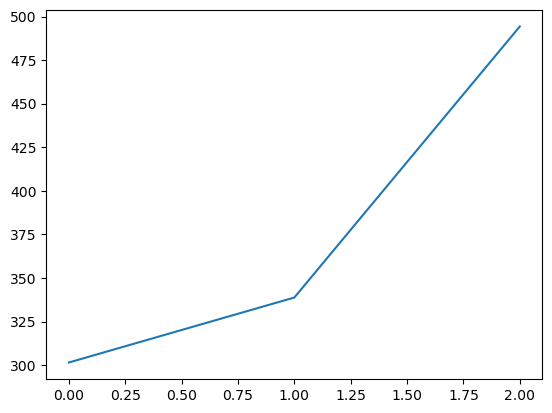

In [68]:
import numpy as np
import matplotlib.pyplot as plt

df = alg.multiLCAAlgebric(normalised_S1_dryline_model, 
                     impacts, 
                     # Parameters of the model
                     use_KNO3 = 1,
                     N_source_S1 = 'N_no_burdens',
                     elec_S1_drying = 'grid_IT',
                     heat_S1_drying = 'heat_CHP_no_burdens',
                     elec_S1_rest = 'grid_IT',            
                     productivity_change = [0, -0.11, -0.39])

plt.plot(df['climate change - GWP100[kg CO2-Eq]'])

### 8.4. Parameterisation of all activities in S2

In [69]:
## S2A1MACERATION
S2A1Maceration_PARAM = [act for act in bw.Database(db_param) if 'S2A1Maceration' in act['name']][0]
S2A1Maceration_PARAM.updateExchanges({'electricity*' : elec_S23_switch_act})

alg.exploreImpacts(GWP, S2A1Maceration_PARAM, elec_S23 = 'grid_FR')

S2A1Maceration (1.000000 unit)   
                                                                         input   
electricity, medium voltage                       elec_S23_switch_act{user-db}  \
tap water                     market for tap water[Europe without Switzerland]   
waste plastic, mixture                   market for waste plastic, mixture[FR]   
wastewater, average          treatment of wastewater, average, capacity 1E9...   

                                                    
                                  amount    impact  
electricity, medium voltage      0.32567  0.027806  
tap water                    1172.937649  0.391912  
waste plastic, mixture         -0.210034  0.318334  
wastewater, average            -0.021603  0.010366

In [70]:
## S2A2CENTRIFUGATION
S2A2Centrifugation_PARAM = [act for act in bw.Database(db_param) if 'S2A2Centrifugation' in act['name']][0]
S2A2Centrifugation_PARAM.updateExchanges({'electricity*' : elec_S23_switch_act})

alg.exploreImpacts(GWP, S2A2Centrifugation_PARAM, elec_S23 = 'grid_FR')

S2A2Centrifugation (1.000000 unit)   
                                                                                                input   
electricity, medium voltage                                              elec_S23_switch_act{user-db}  \
hydrogen peroxide, without water, in 50% soluti...  market for hydrogen peroxide, without water, i...   
nitric acid, without water, in 50% solution state   market for nitric acid, without water, in 50% ...   
sodium hydroxide, without water, in 50% solutio...  market for sodium hydroxide, without water, in...   
tap water                                            market for tap water[Europe without Switzerland]   
wastewater, average                                 treatment of wastewater, average, capacity 1E9...   
water, ultrapure                                                     market for water, ultrapure[RER]   

                                                                           
                                                         amount    impact  
electricity, medium voltage                          107.921868  9.214584  
hydrogen peroxide, without water, in 50% soluti...          0.0       0.0  
nitric acid, without water, in 50% solution state      1.996216  6.372376  
sodium hydroxide, without water, in 50% solutio...     2.831914  3.655592  
tap water                                           3688.567479  1.232456  
wastewater, average                                   -3.414811  1.638544  
water, ultrapure                                       1.330999  0.004008

In [71]:
## S2A3FILTRATION
S2A3Filtration_PARAM = [act for act in bw.Database(db_param) if 'S2A3Filtration' in act['name']][0]
S2A3Filtration_PARAM.updateExchanges({'electricity*' : elec_S23_switch_act})

alg.exploreImpacts(GWP, S2A3Filtration_PARAM, elec_S23 = 'grid_FR')

S2A3Filtration (1.000000 unit)   
                                                                         input   
electricity, medium voltage                       elec_S23_switch_act{user-db}  \
sulfate pulp, bleached                  market for sulfate pulp, bleached[RER]   
tap water                     market for tap water[Europe without Switzerland]   
waste paperboard                               market for waste paperboard[FR]   
wastewater, average          treatment of wastewater, average, capacity 1E9...   

                                                    
                                 amount     impact  
electricity, medium voltage         0.0        0.0  
sulfate pulp, bleached        22.481142   8.347127  
tap water                    777.427598   0.259761  
waste paperboard             -22.481142  11.169456  
wastewater, average           -0.702978   0.337313

In [72]:
## S2A4ULTRAFILTRATION1
S2A4Ultrafiltration1_PARAM = [act for act in bw.Database(db_param) if 'S2A4Ultrafiltration1' in act['name']][0]
S2A4Ultrafiltration1_PARAM.updateExchanges({'electricity*' : elec_S23_switch_act})

alg.exploreImpacts(GWP, S2A4Ultrafiltration1_PARAM, elec_S23 = 'grid_FR')

S2A4Ultrafiltration1 (1.000000 unit)   
                                                                                                input   
electricity, medium voltage                                              elec_S23_switch_act{user-db}  \
hydrogen peroxide, without water, in 50% soluti...  market for hydrogen peroxide, without water, i...   
nitric acid, without water, in 50% solution state   market for nitric acid, without water, in 50% ...   
sodium hydroxide, without water, in 50% solutio...  market for sodium hydroxide, without water, in...   
tap water                                            market for tap water[Europe without Switzerland]   
wastewater, average                                 treatment of wastewater, average, capacity 1E9...   
water, ultrapure                                                     market for water, ultrapure[RER]   

                                                                            
                                                         amount     impact  
electricity, medium voltage                          206.953887  17.670136  
hydrogen peroxide, without water, in 50% soluti...     0.166828   0.188329  
nitric acid, without water, in 50% solution state      5.590798  17.847101  
sodium hydroxide, without water, in 50% solutio...     9.528418  12.299814  
tap water                                           7046.292738   2.354368  
wastewater, average                                   -3.271914   1.569977  
water, ultrapure                                      21.377136   0.064373

In [73]:
## S2A5ULTRAFILTRATION2
S2A5Ultrafiltration2_PARAM = [act for act in bw.Database(db_param) if 'S2A5Ultrafiltration2' in act['name']][0]
S2A5Ultrafiltration2_PARAM.updateExchanges({'electricity*' : elec_S23_switch_act})

alg.exploreImpacts(GWP, S2A5Ultrafiltration2_PARAM, elec_S23 = 'grid_FR')

S2A5Ultrafiltration2 (1.000000 unit)   
                                                                                                input   
electricity, medium voltage                                              elec_S23_switch_act{user-db}  \
nitric acid, without water, in 50% solution state   market for nitric acid, without water, in 50% ...   
sodium hydroxide, without water, in 50% solutio...  market for sodium hydroxide, without water, in...   
tap water                                            market for tap water[Europe without Switzerland]   
wastewater, average                                 treatment of wastewater, average, capacity 1E9...   
water, ultrapure                                                     market for water, ultrapure[RER]   

                                                                           
                                                         amount    impact  
electricity, medium voltage                           28.901854  2.467698  
nitric acid, without water, in 50% solution state      2.327991  7.431479  
sodium hydroxide, without water, in 50% solutio...     1.347454  1.739369  
tap water                                           2633.692562  0.879992  
wastewater, average                                   -2.561861  1.229269  
water, ultrapure                                       3.864023  0.011636

In [74]:
## S2A6CONCENTRATION
S2A6Concentration_PARAM = [act for act in bw.Database(db_param) if 'S2A5Ultrafiltration2' in act['name']][0]
S2A6Concentration_PARAM.updateExchanges({'electricity*' : elec_S23_switch_act})

alg.exploreImpacts(GWP, S2A6Concentration_PARAM, elec_S23 = 'grid_FR')

S2A5Ultrafiltration2 (1.000000 unit)   
                                                                                                input   
electricity, medium voltage                                              elec_S23_switch_act{user-db}  \
nitric acid, without water, in 50% solution state   market for nitric acid, without water, in 50% ...   
sodium hydroxide, without water, in 50% solutio...  market for sodium hydroxide, without water, in...   
tap water                                            market for tap water[Europe without Switzerland]   
wastewater, average                                 treatment of wastewater, average, capacity 1E9...   
water, ultrapure                                                     market for water, ultrapure[RER]   

                                                                           
                                                         amount    impact  
electricity, medium voltage                           28.901854  2.467698  
nitric acid, without water, in 50% solution state      2.327991  7.431479  
sodium hydroxide, without water, in 50% solutio...     1.347454  1.739369  
tap water                                           2633.692562  0.879992  
wastewater, average                                   -2.561861  1.229269  
water, ultrapure                                       3.864023  0.011636

In [75]:
## S2A7APACAKGING
S2A7aPackaging_PARAM = [act for act in bw.Database(db_param) if 'S2A7aPackaging' in act['name']][0]

## S2A7BPACAKGING
S2A7bPackaging_PARAM = [act for act in bw.Database(db_param) if 'S2A7bPackaging' in act['name']][0]

## S2A7PACKAGING 
S2A7cPackaging_PARAM = [act for act in bw.Database(db_param) if 'S2A7cPackaging' in act['name']][0]

### 8.5. Parameterisation of all activities in S3

In [76]:
## S3A1EXTRACTION
S3A1Extraction_PARAM = [act for act in bw.Database(db_param) if 'S3A1Extraction' in act['name']][0]
S3A1Extraction_PARAM.updateExchanges({'electricity*' : elec_S23_switch_act})

alg.exploreImpacts(GWP, S3A1Extraction_PARAM, elec_S23 = 'grid_FR')

S3A1Extraction (1.000000 unit)   
                                                                         input   
electricity, medium voltage                       elec_S23_switch_act{user-db}  \
sulfuric acid                                    market for sulfuric acid[RER]   
tap water                     market for tap water[Europe without Switzerland]   
wastewater, average          treatment of wastewater, average, capacity 1E9...   
water, ultrapure                              market for water, ultrapure[RER]   

                                                  
                                amount    impact  
electricity, medium voltage  33.093727  2.825608  
sulfuric acid                 2.311999  0.245069  
tap water                    505.30226  0.168836  
wastewater, average           -0.50267  0.241198  
water, ultrapure              1.479733  0.004456

In [77]:
## S3A2DIAFILTRATION
S3A2Diafiltration_PARAM = [act for act in bw.Database(db_param) if 'S3A2Diafiltration' in act['name']][0]
S3A2Diafiltration_PARAM.updateExchanges({'electricity*' : elec_S23_switch_act})

alg.exploreImpacts(GWP, S3A2Diafiltration_PARAM, elec_S23 = 'grid_FR')

S3A2Diafiltration (1.000000 unit)   
                                                                                                input   
electricity, medium voltage                                              elec_S23_switch_act{user-db}  \
sodium hydroxide, without water, in 50% solutio...  market for sodium hydroxide, without water, in...   
tap water                                            market for tap water[Europe without Switzerland]   
wastewater, average                                 treatment of wastewater, average, capacity 1E9...   
water, ultrapure                                                     market for water, ultrapure[RER]   

                                                                          
                                                        amount    impact  
electricity, medium voltage                          16.345073  1.395575  
sodium hydroxide, without water, in 50% solutio...    0.840942  1.085535  
tap water                                           693.260951  0.231638  
wastewater, average                                  -0.586756  0.281546  
water, ultrapure                                      0.442353  0.001332

In [78]:
## S3A3ULTRAFILTRATION
S3A3Ultrafiltration_PARAM = [act for act in bw.Database(db_param) if 'S3A3Ultrafiltration' in act['name']][0]
S3A3Ultrafiltration_PARAM.updateExchanges({'electricity*' : elec_S23_switch_act})

alg.exploreImpacts(GWP, S3A3Ultrafiltration_PARAM, elec_S23 = 'grid_FR')

S3A3Ultrafiltration (1.000000 unit)   
                                                                                                input   
electricity, medium voltage                                              elec_S23_switch_act{user-db}  \
sodium hydroxide, without water, in 50% solutio...  market for sodium hydroxide, without water, in...   
tap water                                            market for tap water[Europe without Switzerland]   
wastewater, average                                 treatment of wastewater, average, capacity 1E9...   
water, ultrapure                                                     market for water, ultrapure[RER]   

                                                                          
                                                        amount    impact  
electricity, medium voltage                           21.39185  1.826479  
sodium hydroxide, without water, in 50% solutio...    0.857259  1.106598  
tap water                                           511.562793  0.170928  
wastewater, average                                  -0.524149  0.251505  
water, ultrapure                                      0.939095  0.002828

In [79]:
## S3A4CONCENTRATION
S3A4Concentration_PARAM = [act for act in bw.Database(db_param) if 'S3A4Concentration' in act['name']][0]
S3A4Concentration_PARAM.updateExchanges({'electricity*' : elec_S23_switch_act})

alg.exploreImpacts(GWP, S3A4Concentration_PARAM, elec_S23 = 'grid_FR')

S3A4Concentration (1.000000 unit)   
                                                                         input   
electricity, medium voltage                       elec_S23_switch_act{user-db}  \
tap water                     market for tap water[Europe without Switzerland]   
wastewater, average          treatment of wastewater, average, capacity 1E9...   

                                                    
                                 amount     impact  
electricity, medium voltage  198.591997  16.956181  
tap water                    405.494494   0.135487  
wastewater, average           -0.405494    0.19457

In [80]:
## S3A5PACKAGING
S3A5Packaging_PARAM = [act for act in bw.Database(db_param) if 'S3A5Packaging' in act['name']][0]

## S3A6STABILISATION
S3A6STabilisation_PARAM = [act for act in bw.Database(db_param) if 'S3A6STabilisation' in act['name']][0]

### 8.6. Scaled model of S23

In [81]:
model_S2_after_centri = alg.newActivity(db_param, 
                                        'model_S2_after_centri', 
                                        'kg', 
                                        {S2A3Filtration_PARAM : 1,
                                         S2A4Ultrafiltration1_PARAM : 1,
                                         S2A5Ultrafiltration2_PARAM : 1,
                                         S2A6Concentration_PARAM : 1,
                                         S2A7aPackaging_PARAM: 1,
                                         S2A7bPackaging_PARAM: 1,
                                         S2A7cPackaging_PARAM: 1})

In [82]:
model_S2 = alg.newActivity(db_param, 
                             'model_S2', 
                             'kg', 
                             {S2A1Maceration_PARAM : 1,
                              S2A2Centrifugation_PARAM : 1,
                              model_S2_after_centri : 1 * blue_extract_UF2 / ((new_extraction_efficiency / extraction_efficiency) * blue_extract_UF2),
                             })

In [83]:
model_S3 = alg.newActivity(db_param, 
                          'model_S3', 
                          'kg', 
                          {S3A1Extraction_PARAM : 1,
                           S3A2Diafiltration_PARAM : 1,
                           S3A3Ultrafiltration_PARAM : 1,
                           S3A4Concentration_PARAM : 1,
                           S3A6STabilisation_PARAM : 1,
                           S3A5Packaging_PARAM: 1
                           })

In [84]:
model_S23 = alg.newActivity(db_param, 
                             'model_S23', 
                             'kg', 
                             {S2A1Maceration_PARAM : 1,
                              S2A2Centrifugation_PARAM : 1,
                              model_S2_after_centri : 1 * blue_extract_UF2 / ((new_extraction_efficiency / extraction_efficiency) * blue_extract_UF2),
                              model_S3 : 1 * CPA_concentrate / ((1/(new_extraction_efficiency / extraction_efficiency)) * CPA_concentrate)
                             })

In [85]:
alg.multiLCAAlgebric(model_S23, 
                     impacts, 
                     # Parameters of the model
                     new_extraction_efficiency = 0.9216,
                     elec_S23 = 'grid_FR')

,agricultural land occupation - ALOP[square meter-year],ozone depletion - ODPinf[kg CFC-11-Eq],climate change - GWP100[kg CO2-Eq],terrestrial acidification - TAP100[kg SO2-Eq],photochemical oxidant formation - POFP[kg NMVOC-Eq],metal depletion - MDP[kg Fe-Eq],water depletion - WDP[m3 water-Eq],"freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]","human toxicity - HTPinf[kg 1,4-DCB-Eq]",urban land occupation - ULOP[square meter-year],particulate matter formation - PMFP[kg PM10-Eq],freshwater eutrophication - FEP[kg P-Eq],natural land transformation - NLTP[square meter],marine eutrophication - MEP[kg N-Eq],"terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]",fossil depletion - FDP[kg oil-Eq],ionising radiation - IRP_HE[kg U235-Eq],"marine ecotoxicity - METPinf[kg 1,4-DB-Eq]"
model_S23,156.969632,0.000074,214.212622,0.851147,0.653329,14.488874,5.947031,0.140822,22.135009,2.465643,0.353345,0.019381,-0.0131,0.298717,0.019231,80.23006,78.651306,0.274146


In [86]:
import numpy as np
import matplotlib.pyplot as plt

df = alg.multiLCAAlgebric(model_S23, 
                     impacts, 
                     # Parameters of the model
                     new_extraction_efficiency = 0.9216,
                     elec_S23 = 'grid_FR')

### 8.7. Parameterisation of transport

In [87]:
## S1A8TRANSPORT
S1A8Transport_PARAM = [act for act in bw.Database(db_param) if 'S1A8Transport' in act['name']][0]
S1A8Transport_PARAM.updateExchanges({'transport, passenger car*' : distance_car_S1,
                                     'transport, freight, sea*' : distance_ferry_S12, ### CHANGE COMTAINER TO FERRY
                                     'transport, freight, lorry*' : distance_lorry_S12
                                    })

alg.exploreImpacts(GWP, S1A8Transport_PARAM, 
                   distance_car_S1 = 50,
                   distance_ferry_S12 = 800,
                   distance_lorry_S12 = 30
                  )

S1A8Transport (1.000000 unit)   
                                                                                                input   
transport, freight, lorry, unspecified              market for transport, freight, lorry, unspecif...  \
transport, freight, sea, container ship             market for transport, freight, sea, container ...   
transport, passenger car, large size, petrol, E...  market for transport, passenger car, large siz...   

                                                                             
                                                   amount            impact  
transport, freight, lorry, unspecified                 30  3.90622361615754  
transport, freight, sea, container ship               800  7.47461032985018  
transport, passenger car, large size, petrol, E...     50  21.7501250049668

In [88]:
## S2A8TRANSPORT
S2A8Transport_PARAM = [act for act in bw.Database(db_param) if 'S2A8Transport' in act['name']][0]
S2A8Transport_PARAM.updateExchanges({'transport, freight, lorry*' : distance_lorry_refr_S23})

alg.exploreImpacts(GWP, S2A8Transport_PARAM, 
                   distance_lorry_refr_S23 = 800) ### what value???

S2A8Transport (1.000000 unit)   
                                                              amount   
transport, freight, lorry, unspecified                           800  \

                                                           
                                                  impact   
transport, freight, lorry, unspecified  104.165963097534  \

                                                                                           
                                                                                    input  
transport, freight, lorry, unspecified  market for transport, freight, lorry, unspecif...

In [89]:
model_transport = alg.newActivity(db_param, 'model_transport', 'unit', {
    S2A8Transport_PARAM : 1})

### 8.8. Parameterisation of operation and infrastructures

In [90]:
## S1A0OPERATION
S1A0Operation_PARAM = [act for act in bw.Database(db_param) if 'S1A0Operation' in act['name']][0]
S1A0Operation_PARAM.updateExchanges({'electricity*' : elec_S1_operation_switch_act})

alg.exploreImpacts(GWP, S1A0Operation_PARAM, elec_S1_operation = 'grid_IT')

S1A0Operation (1.000000 unit)   
                                                                                                input   
electricity, medium voltage                                     elec_S1_operation_switch_act{user-db}  \
municipal solid waste                                            market for municipal solid waste[IT]   
sodium hypochlorite, without water, in 15% solu...  market for sodium hypochlorite, without water,...   
tap water                                           tap water production, underground water withou...   
waste paperboard                                                      market for waste paperboard[IT]   
waste plastic, mixture                                          market for waste plastic, mixture[IT]   

                                                                            
                                                         amount     impact  
electricity, medium voltage                           40.969071  17.662774  
municipal solid waste                                    -0.308   0.161241  
sodium hypochlorite, without water, in 15% solu...     0.009075   0.019705  
tap water                                           3460.003288   0.592736  
waste paperboard                                          -2.93   2.056007  
waste plastic, mixture                                   -0.866   0.972519

In [91]:
## S1A0BUILDING
S1A0Building_PARAM = [act for act in bw.Database(db_param) if 'S1A0Building' in act['name']][0]

In [92]:
model_infrastructures = alg.newActivity(db_param, 'model_infrastructures', 'unit', {
    S1A0Building_PARAM : 1})

In [93]:
model_operation = alg.newActivity(db_param, 'model_operation', 'unit', {
    S1A0Operation_PARAM : 1})

### 8.9. Create model S123 dry line

In [94]:
# create a model activity for S123 dry line
model_S1234 = alg.newActivity(db_param, 'model_S1234', 'unit', {
    S1A0Building_PARAM : 1,
    S1A0Operation_PARAM : 1,
    normalised_S1_dryline_model:1,
    model_S23: 1,
    S1A8Transport_PARAM: 1,
    S2A8Transport_PARAM: 1 
    })

Test the function for one specific scenario.

In [95]:
alg.multiLCAAlgebric(model_S1234, 
                     impacts, 
                     
                     # biomass productivity (depends on nutrient source)
                     productivity_change = 0,
                     
                     # phycocyanin extraction efficiency (wet vs. dry line)
                     new_extraction_efficiency = 0.9216,
                     
                     # nitrogen sources
                     use_KNO3 = 1,
                     N_source_S1 = 'N_no_burdens',
                     
                     #energy sources
                     elec_S1_rest = 'grid_IT',
                     elec_S1_drying = 'grid_IT',
                     heat_S1_drying = 'heat_CHP_alloc',
                     elec_S1_operation = 'grid_IT',
                     elec_S23 = 'grid_FR',
                     
                     # transport distances
                     distance_lorry_refr_S23 = 1020,
                     distance_ferry_S12 = 800,
                     distance_lorry_S12 = 30,
                     distance_car_S1 = 50
                     )

,agricultural land occupation - ALOP[square meter-year],ozone depletion - ODPinf[kg CFC-11-Eq],climate change - GWP100[kg CO2-Eq],terrestrial acidification - TAP100[kg SO2-Eq],photochemical oxidant formation - POFP[kg NMVOC-Eq],metal depletion - MDP[kg Fe-Eq],water depletion - WDP[m3 water-Eq],"freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]","human toxicity - HTPinf[kg 1,4-DCB-Eq]",urban land occupation - ULOP[square meter-year],particulate matter formation - PMFP[kg PM10-Eq],freshwater eutrophication - FEP[kg P-Eq],natural land transformation - NLTP[square meter],marine eutrophication - MEP[kg N-Eq],"terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]",fossil depletion - FDP[kg oil-Eq],ionising radiation - IRP_HE[kg U235-Eq],"marine ecotoxicity - METPinf[kg 1,4-DB-Eq]"
model_S1234,414.294579,0.000135,768.25922,4.962333,2.791299,60.468388,11.068061,0.458904,89.690907,15.599431,1.525474,0.039232,-0.045409,0.613743,0.114004,244.454569,99.925703,1.277798


## 9. Scenario LCA analysis

In [96]:
import pandas as pd
df = pd.read_excel(r'/home/leabraud/Dropbox/LCASpiralg_AD/code/scenarios.xlsx')
df

,Abbreviation,productivity_change,new_extraction_efficiency,elec_S1_operation,elec_S1_drying,heat_S1_drying,heat_S4_Nrec,elec_S1_rest,elec_S23,use_KNO3,N_source_S1,distance_car_S1,distance_ferry_S12,distance_lorry_S12,distance_lorry_refr_S23
0,B,0.0000,0.921600,grid_IT,grid_IT,heat_CHP_no_burdens,heat_CHP_no_burdens,grid_IT,grid_FR,1,N_no_burdens,50,800,30,1020
1,Bh,0.0000,0.921600,grid_IT,grid_IT,heat_CHP_alloc,heat_CHP_no_burdens,grid_IT,grid_FR,1,N_no_burdens,50,800,30,1020
2,ADc,-0.3992,0.921600,elec_CHP_alloc,elec_CHP_alloc,heat_CHP_alloc,heat_CHP_alloc,elec_CHP_alloc,grid_FR,0,Ncitr_alloc,50,800,30,1020
3,ADs,-0.1179,0.921600,elec_CHP_alloc,elec_CHP_alloc,heat_CHP_alloc,heat_CHP_alloc,elec_CHP_alloc,grid_FR,0,Nsulf_alloc,50,800,30,1020
4,CLw,0.0000,0.162051,grid_IT,elec_CHP_no_burdens,heat_CHP_no_burdens,heat_CHP_no_burdens,grid_IT,grid_IT,1,N_no_burdens,0,0,0,0
5,CLd,0.0000,0.921600,grid_IT,grid_IT,heat_CHP_alloc,heat_CHP_no_burdens,grid_IT,grid_IT,1,N_no_burdens,0,0,0,0
6,PV,0.0000,0.921600,PV_IT,PV_IT,heat_CHP_alloc,heat_CHP_no_burdens,PV_IT,grid_FR,1,N_no_burdens,50,800,30,1020
7,ADc/CLw,-0.3992,0.162051,elec_CHP_alloc,elec_CHP_no_burdens,heat_CHP_no_burdens,heat_CHP_alloc,elec_CHP_alloc,elec_CHP_alloc,0,Ncitr_alloc,0,0,0,0
8,ADs/CLw,-0.1179,0.162051,elec_CHP_alloc,elec_CHP_no_burdens,heat_CHP_no_burdens,heat_CHP_alloc,elec_CHP_alloc,elec_CHP_alloc,0,Nsulf_alloc,0,0,0,0
9,ADc/CLd,-0.3992,0.921600,elec_CHP_alloc,elec_CHP_alloc,heat_CHP_alloc,heat_CHP_alloc,elec_CHP_alloc,elec_CHP_alloc,0,Ncitr_alloc,0,0,0,0


In [97]:
df_scenarios = alg.multiLCAAlgebric(model_S1234, 
                     impacts, 
                     
                     # biomass productivity (depends on nutrient source)
                     productivity_change = list(df['productivity_change']),
                     
                     # phycocyanin extraction efficiency (wet vs. dry line)
                     new_extraction_efficiency = list(df['new_extraction_efficiency']),
                     
                     # energy sources
                     elec_S1_operation = list(df['elec_S1_operation']),
                     elec_S1_drying = list(df['elec_S1_drying']),
                     heat_S1_drying = list(df['heat_S1_drying']),
                     heat_S4_Nrec = list(df['heat_S4_Nrec']),
                     elec_S1_rest = list(df['elec_S1_rest']),
                     elec_S23 = list(df['elec_S23']),
                                    
                     # nutrient sources
                     use_KNO3 = list(df['use_KNO3']),
                     N_source_S1 = list(df['N_source_S1']),

                     # transport distances
                     distance_car_S1 = list(df['distance_car_S1']),
                     distance_ferry_S12 = list(df['distance_ferry_S12']),
                     distance_lorry_S12 = list(df['distance_lorry_S12']),
                     distance_lorry_refr_S23 = list(df['distance_lorry_refr_S23'])
                    )
df_scenarios

,agricultural land occupation - ALOP[square meter-year],ozone depletion - ODPinf[kg CFC-11-Eq],climate change - GWP100[kg CO2-Eq],terrestrial acidification - TAP100[kg SO2-Eq],photochemical oxidant formation - POFP[kg NMVOC-Eq],metal depletion - MDP[kg Fe-Eq],water depletion - WDP[m3 water-Eq],"freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]","human toxicity - HTPinf[kg 1,4-DCB-Eq]",urban land occupation - ULOP[square meter-year],particulate matter formation - PMFP[kg PM10-Eq],freshwater eutrophication - FEP[kg P-Eq],natural land transformation - NLTP[square meter],marine eutrophication - MEP[kg N-Eq],"terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]",fossil depletion - FDP[kg oil-Eq],ionising radiation - IRP_HE[kg U235-Eq],"marine ecotoxicity - METPinf[kg 1,4-DB-Eq]"
0,187.566201,0.000134,722.059750,3.471366,2.685263,59.043873,11.003543,0.453106,89.546184,15.328389,1.303829,0.033803,-0.044862,0.425688,0.114187,240.156226,99.395793,1.262656
1,414.294579,0.000135,768.259220,4.962333,2.791299,60.468388,11.068061,0.458904,89.690907,15.599431,1.525474,0.039232,-0.045409,0.613743,0.114004,244.454569,99.925703,1.277798
2,3541.880860,0.000153,1278.399109,24.030885,4.493718,93.197672,19.770752,0.966724,101.889771,20.704851,4.511117,0.130544,-0.054754,3.436516,0.675788,297.166682,111.902203,1.667750
3,2484.537180,0.000124,885.201041,16.425209,3.224655,65.279449,10.233381,0.437125,78.266387,16.820484,3.131590,0.084309,-0.041537,2.260977,0.102680,214.731803,97.798362,1.250131
4,929.926494,0.000196,1683.229574,7.221346,4.688614,88.389313,28.441675,0.782272,127.348931,15.098146,2.532215,0.099660,-0.079436,1.207660,0.112179,603.141995,57.418958,1.583050
5,430.203133,0.000085,814.438702,5.029938,2.149301,49.951717,11.611046,0.351110,58.792713,6.080109,1.369112,0.044200,-0.035812,0.593400,0.045935,265.299311,26.473333,0.736095
6,401.772047,0.000119,644.770119,4.515227,2.559769,69.371792,10.267344,0.460996,98.542319,15.305169,1.420127,0.036649,-0.044120,0.606247,0.155361,196.308725,94.778397,1.512351
7,9249.298248,0.000166,2662.758353,58.641428,7.656297,149.574415,32.090519,1.320751,120.181090,24.427006,9.995009,0.297651,-0.086385,8.329225,0.652991,525.449635,56.443867,2.080411
8,8450.411428,0.000139,2322.634444,52.743959,6.513583,123.346352,22.627571,0.797870,96.767263,20.852911,8.870442,0.257614,-0.073825,7.368199,0.079692,447.960662,42.951128,1.680472
9,5923.749532,0.000084,1554.437582,38.893936,4.462342,95.795575,18.185707,0.875689,62.796194,13.163913,6.412274,0.184604,-0.044482,5.375459,0.598620,264.726558,33.222031,1.181617


In [98]:
df_scenarios_index = alg.multiLCAAlgebric(model_S1234, 
                     impacts, 
                     
                     # biomass productivity (depends on nutrient source)
                     productivity_change = list(df['productivity_change']),
                     
                     # phycocyanin extraction efficiency (wet vs. dry line)
                     new_extraction_efficiency = list(df['new_extraction_efficiency']),
                     
                     # energy sources
                     elec_S1_operation = list(df['elec_S1_operation']),
                     elec_S1_drying = list(df['elec_S1_drying']),
                     heat_S1_drying = list(df['heat_S1_drying']),
                     heat_S4_Nrec = list(df['heat_S4_Nrec']),
                     elec_S1_rest = list(df['elec_S1_rest']),
                     elec_S23 = list(df['elec_S23']),
                                    
                     # nutrient sources
                     use_KNO3 = list(df['use_KNO3']),
                     N_source_S1 = list(df['N_source_S1']),

                     # transport distances
                     distance_car_S1 = list(df['distance_car_S1']),
                     distance_ferry_S12 = list(df['distance_ferry_S12']),
                     distance_lorry_S12 = list(df['distance_lorry_S12']),
                     distance_lorry_refr_S23 = list(df['distance_lorry_refr_S23'])
                    )

df_scenarios_index.insert(0, 'Abbreviations', list(df['Abbreviation']), True)
df_scenarios_index.set_index('Abbreviations')
df_scenarios_index.to_excel(str(resdir+'/aggregated_LCA_results.xlsx'))

## Graph percentages of variation from the baseline

In [99]:
# Create a new DataFrame to store the percentage differences
df_scenarios_index.set_index('Abbreviations', inplace=True)
percentage_df = pd.DataFrame(index=df_scenarios_index.index)
# Calculate the percentage difference for each column
for column in df_scenarios_index.columns:
    baseline = df_scenarios_index.loc['B', column]
    percentage_df[column] = ((df_scenarios_index[column] - baseline) / baseline) * 100
percentage_df.to_excel(str(resdir+'/percentage_diff.xlsx'))
percentage_df

,agricultural land occupation - ALOP[square meter-year],ozone depletion - ODPinf[kg CFC-11-Eq],climate change - GWP100[kg CO2-Eq],terrestrial acidification - TAP100[kg SO2-Eq],photochemical oxidant formation - POFP[kg NMVOC-Eq],metal depletion - MDP[kg Fe-Eq],water depletion - WDP[m3 water-Eq],"freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]","human toxicity - HTPinf[kg 1,4-DCB-Eq]",urban land occupation - ULOP[square meter-year],particulate matter formation - PMFP[kg PM10-Eq],freshwater eutrophication - FEP[kg P-Eq],natural land transformation - NLTP[square meter],marine eutrophication - MEP[kg N-Eq],"terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]",fossil depletion - FDP[kg oil-Eq],ionising radiation - IRP_HE[kg U235-Eq],"marine ecotoxicity - METPinf[kg 1,4-DB-Eq]"
Abbreviations,,,,,,,,,,,,,,,,,,
B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bh,120.879123,1.010913,6.398289,42.950426,3.948804,2.412638,0.586339,1.279583,0.161618,1.768235,16.999576,16.062128,1.218183,44.176634,-0.160554,1.789811,0.533131,1.199215
ADc,1788.336406,14.441282,77.048937,592.260130,67.347428,57.844782,79.676238,113.354972,13.784604,35.075195,245.989974,286.194974,22.049476,707.284537,491.824925,23.738904,12.582434,32.082694
ADs,1224.618810,-7.247548,22.593877,373.162663,20.087128,10.560921,-6.999218,-3.526918,-12.596625,9.734195,140.184143,149.414055,-7.411940,431.134415,-10.077661,-10.586618,-1.607142,-0.991941
CLw,395.785748,45.915256,133.114998,108.026041,74.605383,49.701077,158.477425,72.646686,42.215922,-1.502064,94.213800,194.827973,77.066686,183.695861,-1.758328,151.145683,-42.232004,25.374648
CLd,129.360690,-36.332151,12.793810,44.897933,-19.959393,-15.398983,5.520975,-22.510452,-34.343698,-60.334325,5.007033,30.758707,-20.174581,39.397749,-59.772511,10.469470,-73.365741,-41.702652
PV,114.202796,-11.158984,-10.704049,30.070588,-4.673429,17.491941,-6.690568,1.741350,10.046364,-0.151480,8.919766,8.419690,-1.655221,42.415584,36.058464,-18.257907,-4.645465,19.775423
ADc/CLw,4831.217990,24.096335,268.772578,1589.289552,185.122804,153.327582,191.638051,191.488468,34.211292,59.357948,666.589081,780.555616,92.555967,1856.648557,471.860524,118.794925,-43.213023,64.764682
ADs/CLw,4405.295400,3.568308,221.667901,1419.400579,142.567780,108.906271,105.638956,76.089095,8.064084,36.041114,580.337984,662.111894,64.558786,1630.890420,-30.209770,86.528856,-56.787781,33.090238


In [100]:
# Define a mapping dictionary for abbreviations
abbreviations = {
    'agricultural land occupation - ALOP[square meter-year]': 'ALOP',
    'ozone depletion - ODPinf[kg CFC-11-Eq]': 'ODP',
    'climate change - GWP100[kg CO2-Eq]': 'GWP',
    'terrestrial acidification - TAP100[kg SO2-Eq]': 'TAP',
    'photochemical oxidant formation - POFP[kg NMVOC-Eq]': 'POFP',
    'metal depletion - MDP[kg Fe-Eq]': 'MDP',    
    'water depletion - WDP[m3 water-Eq]': 'WDP',
    'freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]': 'FETP',
    'human toxicity - HTPinf[kg 1,4-DCB-Eq]': 'HTP',    
    'urban land occupation - ULOP[square meter-year]': 'ULOP',
    'particulate matter formation - PMFP[kg PM10-Eq]': 'PMFP',
    'freshwater eutrophication - FEP[kg P-Eq]': 'FEP',    
    'natural land transformation - NLTP[square meter]': 'NLTP',
    'marine eutrophication - MEP[kg N-Eq]': 'MEP',
    'terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]': 'TETP',    
    'fossil depletion - FDP[kg oil-Eq]': 'FDP',
    'ionising radiation - IRP_HE[kg U235-Eq]': 'IRP',
    'marine ecotoxicity - METPinf[kg 1,4-DB-Eq]': 'METP'}

# Rename columns using the mapping dictionary
percentage_df.rename(columns=abbreviations, inplace=True)

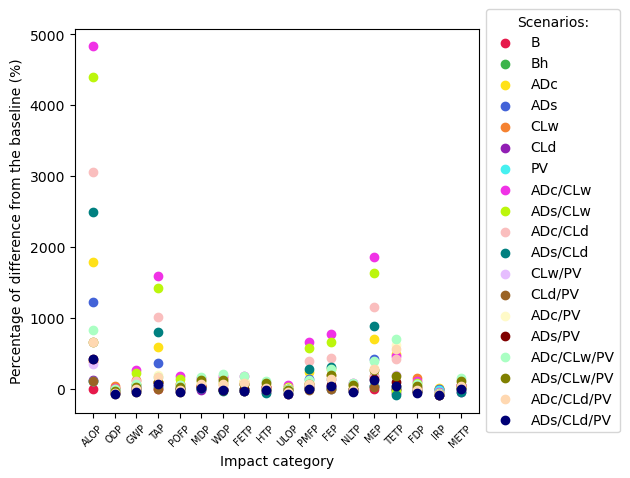

In [101]:
colors =  ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000001'] 

# Create a scatter plot for each row
i = 0
for index, row in percentage_df.iterrows():
    plt.scatter(percentage_df.columns, row, label=index, color=colors[i])
    i+=1

# Add labels and legend
plt.xlabel('Impact category')
plt.ylabel('Percentage of difference from the baseline (%)')
plt.xticks(fontsize=7)
#plt.title('Title')
plt.legend(title='Scenarios:', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Show the plot
plt.xticks(rotation=45)
plt.savefig(str(resdir+'/percentage_variation.pdf'))
plt.show()

## Graph contribution analysis

In [102]:
df_model_S1_dryline = alg.multiLCAAlgebric(normalised_S1_dryline_model, 
                     impacts, 
                                          
                     # biomass productivity (depends on nutrient source)
                     productivity_change = list(df['productivity_change']),
                                           
                     # energy sources
                     elec_S1_operation = list(df['elec_S1_operation']),
                     elec_S1_drying = list(df['elec_S1_drying']),
                     heat_S1_drying = list(df['heat_S1_drying']),
                     heat_S4_Nrec = list(df['heat_S4_Nrec']),
                     elec_S1_rest = list(df['elec_S1_rest']),
                                           
                     # nutrient sources
                     use_KNO3 = list(df['use_KNO3']),
                     N_source_S1 = list(df['N_source_S1'])
                     )

In [103]:
df_model_S1_wetline = alg.multiLCAAlgebric(normalised_S1_wetline_model, 
                     impacts, 
                     
                     # biomass productivity (depends on nutrient source)
                     productivity_change = list(df['productivity_change']),
                                           
                     # energy sources
                     elec_S1_operation = list(df['elec_S1_operation']),
                     elec_S1_drying = list(df['elec_S1_drying']),
                     heat_S1_drying = list(df['heat_S1_drying']),
                     heat_S4_Nrec = list(df['heat_S4_Nrec']),
                     elec_S1_rest = list(df['elec_S1_rest']),
                                           
                     # nutrient sources
                     use_KNO3 = list(df['use_KNO3']),
                     N_source_S1 = list(df['N_source_S1'])
                     )

In [104]:
df_model_S2 = alg.multiLCAAlgebric(model_S2, 
                     impacts, 
                     # phycocyanin extraction efficiency (wet vs. dry line)
                     new_extraction_efficiency = list(df['new_extraction_efficiency']),
                     # energy sources                     
                     elec_S23 = list(df['elec_S23']),
                    )

In [105]:
df_model_S3 = alg.multiLCAAlgebric(model_S3, 
                     impacts, 
                     elec_S23 = list(df['elec_S23']),
                   )

In [106]:
df_model_infrastructures = alg.multiLCAAlgebric(model_infrastructures, 
                     impacts, 
                     # energy sources
                     elec_S1_operation = list(df['elec_S1_operation']),
                    )

In [107]:
df_model_operation = alg.multiLCAAlgebric(model_operation, 
                     impacts, 
                     # energy sources
                     elec_S1_operation = list(df['elec_S1_operation']),
                    )

In [108]:
df_model_transport = alg.multiLCAAlgebric(model_transport, 
                     impacts, 
                     # transport distances
                     distance_car_S1 = list(df['distance_car_S1']),
                     distance_ferry_S12 = list(df['distance_ferry_S12']),
                     distance_lorry_S12 = list(df['distance_lorry_S12']),
                     distance_lorry_refr_S23 = list(df['distance_lorry_refr_S23'])
                    )

In [109]:
df_list = [df_model_infrastructures, df_model_operation, df_model_S1_dryline, df_model_S2, df_model_S3, df_model_transport]

### Contribution analysis graph for GWP

In [110]:
# Selecting the first column of each DataFrame
GWP_cols = [df.iloc[:, 2] for df in df_list]
# Creating a new DataFrame with the first columns
GWP_cols_df = pd.concat(GWP_cols, axis=1, keys = ['infrastructures','operation', 'S1','S2','S3','transport'])
GWP_cols_df.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)
GWP_cols_df

,infrastructures,operation,S1,S2,S3,transport
B,18.929162,21.464982,301.510422,167.303379,46.909243,132.811603
Bh,18.929162,21.464982,347.709893,167.303379,46.909243,132.811603
ADc,18.929162,36.814145,842.500618,167.303379,46.909243,132.811603
ADs,18.929162,36.814145,449.302550,167.303379,46.909243,132.811603
CLw,18.929162,21.464982,272.729665,1345.478070,140.060127,0.000000
CLd,18.929162,21.464982,347.709893,286.274538,140.060127,0.000000
PV,18.929162,6.623754,239.062019,167.303379,46.909243,132.811603
ADc/CLw,18.929162,36.814145,676.070772,1888.567659,240.999982,0.000000
ADs/CLw,18.929162,36.814145,335.946863,1888.567659,240.999982,0.000000
ADc/CLd,18.929162,36.814145,842.500618,415.193675,240.999982,0.000000


In [111]:
GWP_cols_df.to_excel(str(resdir+'/contribution_GWP.xlsx'))

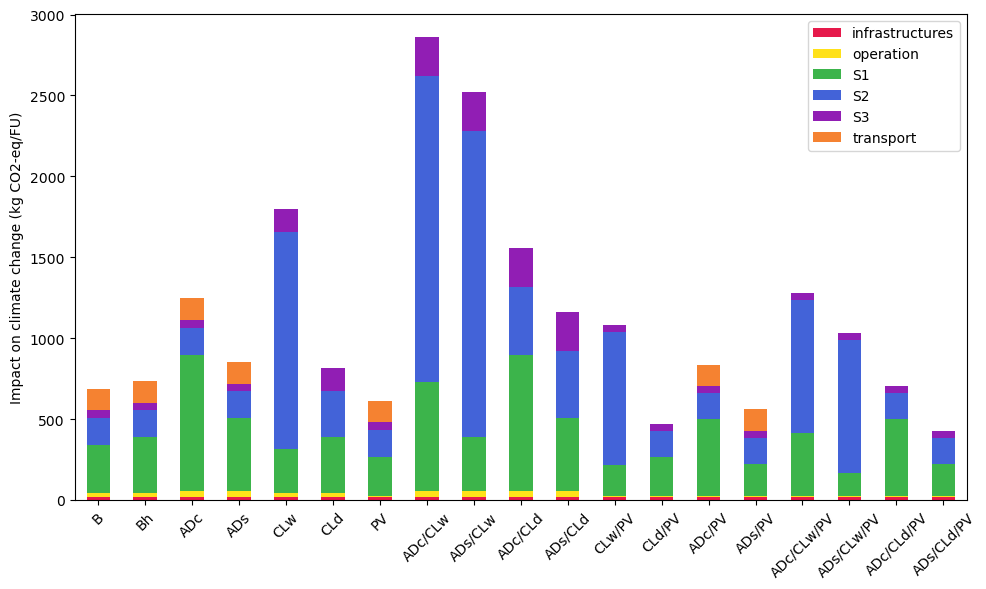

In [112]:
# Plotting stacked bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = ['#e6194b',  '#ffe119', '#3cb44b', '#4363d8', '#911eb4','#f58231']
ax = GWP_cols_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Impact on climate change (kg CO2-eq/FU)')
#ax.set_title('Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(str(resdir+'/contribution_analysis_GWP.pdf'))
plt.show()

### Contribution analysis graph for ALOP

In [113]:
# Selecting the first column of each DataFrame
ALOP_cols = [df.iloc[:, 0] for df in df_list]
# Creating a new DataFrame with the first columns
ALOP_cols_df = pd.concat(ALOP_cols, axis=1, keys = ['infrastructures','operation', 'S1','S2','S3','transport'])
ALOP_cols_df.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)
ALOP_cols_df

,infrastructures,operation,S1,S2,S3,transport
B,0.579583,1.768436,26.254958,152.659331,4.310301,1.580445
Bh,0.579583,1.768436,252.983336,152.659331,4.310301,1.580445
ADc,0.579583,159.758806,3222.579246,152.659331,4.310301,1.580445
ADs,0.579583,159.758806,2165.235566,152.659331,4.310301,1.580445
CLw,0.579583,1.768436,23.492600,901.945624,12.171817,0.000000
CLd,0.579583,1.768436,252.983336,162.699962,12.171817,0.000000
PV,0.579583,0.263447,241.965793,152.659331,4.310301,1.580445
ADc/CLw,0.579583,159.758806,2412.110724,6492.017593,1051.155192,0.000000
ADs/CLw,0.579583,159.758806,1613.223903,6492.017593,1051.155192,0.000000
ADc/CLd,0.579583,159.758806,3222.579246,1489.676705,1051.155192,0.000000


In [114]:
ALOP_cols_df.to_excel(str(resdir+'/contribution_ALOP.xlsx'))

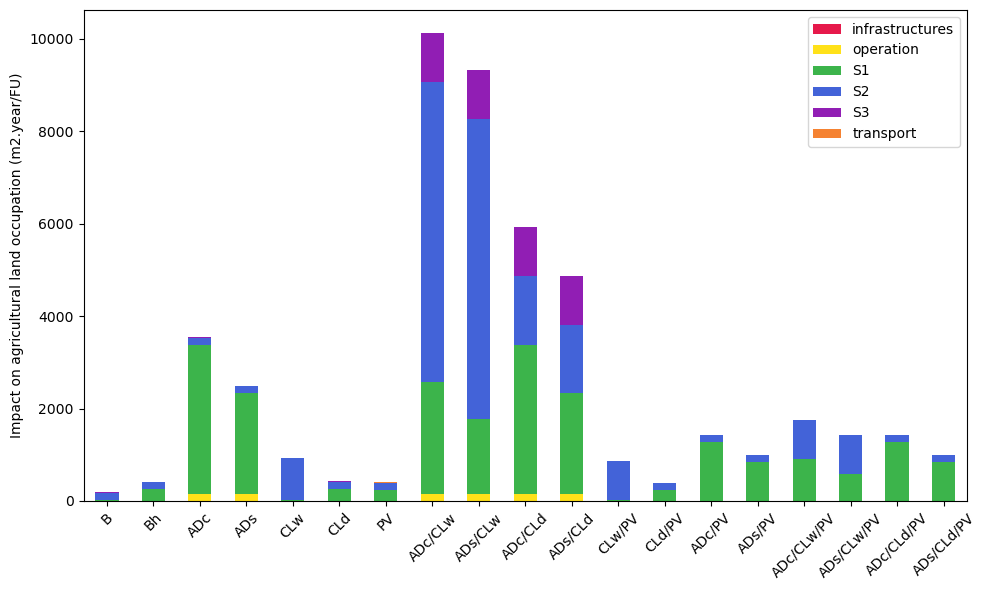

In [115]:
# Plotting stacked bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = ['#e6194b',  '#ffe119', '#3cb44b', '#4363d8', '#911eb4','#f58231']
ax = ALOP_cols_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Impact on agricultural land occupation (m2.year/FU)')
#ax.set_title('Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(str(resdir+'/contribution_analysis_ALOP.pdf'))
plt.show()

## Contribution analysis per activity (for S1, S2, and S3)

In [116]:
### Adjustment factor for S1 (to account for changes in biomass productivity)

def adjustmentXS1 (productivity_change):
    
    dry_spaghettinis_DW_tech2 = 28.78
    total_cultivated_area = 705 * 6 
    initial_concentration = 0.64
    initial_biomass_prod = dry_spaghettinis_DW_tech2 / total_cultivated_area * 1000
    
    adjustment_factor_S1 = dry_spaghettinis_DW_tech2 / ((((dry_spaghettinis_DW_tech2 / total_cultivated_area * 1000) + ((dry_spaghettinis_DW_tech2 / total_cultivated_area * 1000) * productivity_change)) * (dry_spaghettinis_DW_tech2 * initial_concentration / dry_spaghettinis_DW_tech2) / initial_biomass_prod) * dry_spaghettinis_DW_tech2 / (dry_spaghettinis_DW_tech2 * initial_concentration / dry_spaghettinis_DW_tech2))

    return adjustment_factor_S1

list_adj_factor_S1 = []
for val in list(df['productivity_change']):
    list_adj_factor_S1.append(adjustmentXS1(val))

In [117]:
### Adjustment factor for S2 (to account for changes in PC extraction efficiency)

def adjustmentXS2 (new_extraction_eff):
    
    blue_extract_UF2_tech2_scaled = 5.7 # obtained after S2
    extraction_efficiency_tech2 = 0.9216
  
    adjustment_factor_S2 = blue_extract_UF2_tech2_scaled / ((new_extraction_eff / extraction_efficiency_tech2) * blue_extract_UF2_tech2_scaled)
    
    return adjustment_factor_S2

list_adj_factor_S2 = []
for val in list(df['new_extraction_efficiency']):
    list_adj_factor_S2.append(adjustmentXS2(val))

In [118]:
### Adjustement factor for S3 (to account for changes in CPA production)

def adjustmentXS3 (new_extraction_eff):
    
    CPA_concentrate_tech2_scaled = 3.46 # CPA concentrate obtained after S3
    extraction_efficiency_tech2 = 0.9216
  
    adjustment_factor_S3 = CPA_concentrate_tech2_scaled / ((1/(new_extraction_eff / extraction_efficiency_tech2)) * CPA_concentrate_tech2_scaled)
    
    return adjustment_factor_S3

list_adj_factor_S3 = []
for val in list(df['new_extraction_efficiency']):
    list_adj_factor_S3.append(adjustmentXS3(val))

In [119]:
dic_XS123 = {'scenarios': list(df['Abbreviation']),
             'adjustment factor S1': list_adj_factor_S1, 
             'adjustment factor S2': list_adj_factor_S2,
             'adjustment factor S3': list_adj_factor_S3}
df_XS123 = pd.DataFrame(dic_XS123)
df_XS123

,scenarios,adjustment factor S1,adjustment factor S2,adjustment factor S3
0,B,1.000000,1.000000,1.000000
1,Bh,1.000000,1.000000,1.000000
2,ADc,1.664447,1.000000,1.000000
3,ADs,1.133658,1.000000,1.000000
4,CLw,1.000000,5.687099,0.175837
5,CLd,1.000000,1.000000,1.000000
6,PV,1.000000,1.000000,1.000000
7,ADc/CLw,1.664447,5.687099,0.175837
8,ADs/CLw,1.133658,5.687099,0.175837
9,ADc/CLd,1.664447,1.000000,1.000000


### Details of impacts per activity - S1

In [120]:
df_S1A1Cultivation = alg.multiLCAAlgebric(S1A1Cultivation_PARAM, 
                        impacts, 
                        elec_S1_rest = list(df['elec_S1_rest']),
                        # nutrient sources
                        use_KNO3 = list(df['use_KNO3']),
                        N_source_S1 = list(df['N_source_S1'])
                        )

In [121]:
df_S1A2Filtration = alg.multiLCAAlgebric(S1A2Filtration_PARAM, 
                        impacts, 
                        elec_S1_rest = list(df['elec_S1_rest']))

In [122]:
df_S1A3Dewatering = alg.multiLCAAlgebric(S1A3Dewatering_PARAM, 
                        impacts, 
                        elec_S1_rest = list(df['elec_S1_rest']))

In [123]:
df_S1A4Shaping = alg.multiLCAAlgebric(S1A4Shaping_PARAM, 
                        impacts, 
                        elec_S1_rest = list(df['elec_S1_rest']))

In [124]:
df_S1A5Drying = alg.multiLCAAlgebric(S1A5Drying_PARAM, 
                        impacts, 
                        elec_S1_drying = list(df['elec_S1_drying']),
                        heat_S1_drying = list(df['heat_S1_drying']),
                        )

In [125]:
df_S1A6Packaging = alg.multiLCAAlgebric(S1A6Packaging_PARAM, impacts)

In [126]:
# all columns except df_S1A6Packaging (size mismatch)
df_S1_list = [df_S1A1Cultivation,df_S1A2Filtration,df_S1A3Dewatering,df_S1A4Shaping,df_S1A5Drying]
GWP_cols_S1 = [df.iloc[:, 2] for df in df_S1_list]

# merge the columns except df_S1A6Packaging
GWP_cols_S1_df = pd.concat(GWP_cols_S1, axis=1, keys = ['S1A1Cultivation','S1A2Filtration', 'S1A3Dewatering','S1A4Shaping','S1A5Drying'])

# add the value for df_S1A6Packaging, the same for all scenarios
GWP_cols_S1_df['S1A6Packaging'] = df_S1A6Packaging.iloc[:, 2]['S1A6Packaging']

# add the total to compare with previous contribution analysis
#GWP_cols_S1_df['total GWP'] = GWP_cols_S1_df.sum(axis=1)

# multiply all the values by the adjustment factor for S1
new_GWP_df_S1 = pd.DataFrame()
for i in range(len(list(GWP_cols_S1_df.columns))): 
    new_GWP_df_S1[GWP_cols_S1_df.columns[i]] = GWP_cols_S1_df[GWP_cols_S1_df.columns[i]]*df_XS123['adjustment factor S1']

# Add name of the scenarios as index
new_GWP_df_S1.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)

new_GWP_df_S1.to_excel(str(resdir+'/contribution_per_act_GWP_S1.xlsx'))

In [127]:
new_GWP_df_S1

,S1A1Cultivation,S1A2Filtration,S1A3Dewatering,S1A4Shaping,S1A5Drying,S1A6Packaging
B,211.377727,57.664816,1.933953,0.671761,28.780683,1.080708
Bh,211.377727,57.664816,1.933953,0.671761,74.980035,1.080708
ADc,487.772528,179.133334,5.630636,1.733754,166.429418,1.798781
ADs,207.696889,122.008057,3.835037,1.180863,113.355396,1.225153
CLw,211.377727,57.664816,1.933953,0.671761,0.000000,1.080708
CLd,211.377727,57.664816,1.933953,0.671761,74.980035,1.080708
PV,176.977124,9.359552,0.532967,0.314122,50.796931,1.080708
ADc/CLw,487.772528,179.133334,5.630636,1.733754,0.000000,1.798781
ADs/CLw,207.696889,122.008057,3.835037,1.180863,0.000000,1.225153
ADc/CLd,487.772528,179.133334,5.630636,1.733754,166.429418,1.798781


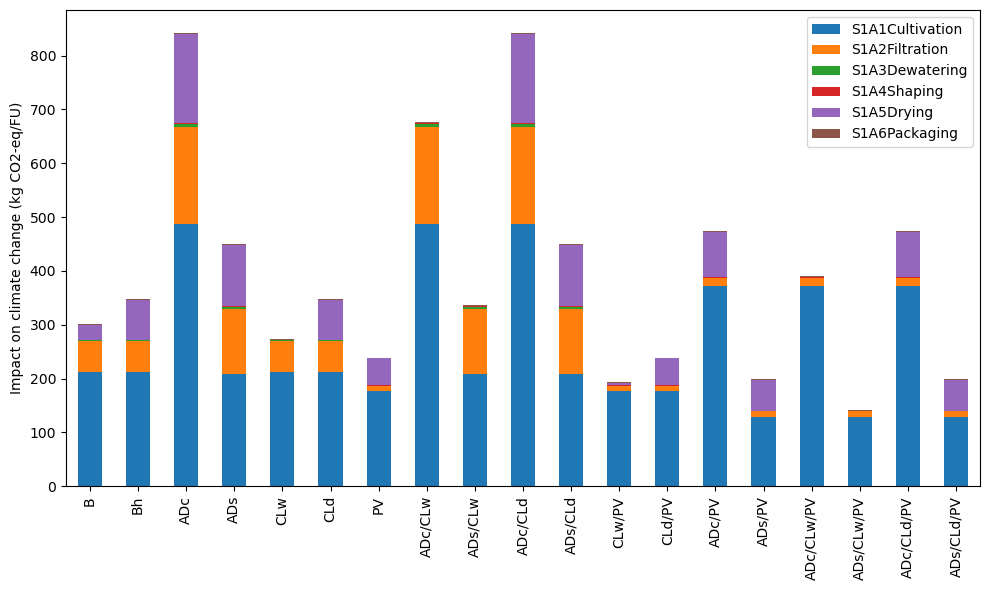

In [128]:
# Plotting stacked bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colors = ['#e6194b',  '#ffe119', '#3cb44b', '#4363d8', '#911eb4','#f58231']
ax = new_GWP_df_S1.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Impact on climate change (kg CO2-eq/FU)')
#ax.set_title('Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(str(resdir+'/contribution_per_act_GWP_S1.pdf'))
plt.show()

In [129]:
# all columns except df_S1A6Packaging (size mismatch)
df_S1_list = [df_S1A1Cultivation,df_S1A2Filtration,df_S1A3Dewatering,df_S1A4Shaping,df_S1A5Drying]
ALOP_cols_S1 = [df.iloc[:, 0] for df in df_S1_list]

# merge the columns except df_S1A6Packaging
ALOP_cols_S1_df = pd.concat(ALOP_cols_S1, axis=1, keys = ['S1A1Cultivation','S1A2Filtration', 'S1A3Dewatering','S1A4Shaping','S1A5Drying'])

# add the value for df_S1A6Packaging, the same for all scenarios
ALOP_cols_S1_df['S1A6Packaging'] = df_S1A6Packaging.iloc[:, 2]['S1A6Packaging']

# add the total to compare with previous contribution analysis
#GWP_cols_S1_df['total GWP'] = GWP_cols_S1_df.sum(axis=1)

# multiply all the values by the adjustment factor for S1
new_ALOP_df_S1 = pd.DataFrame()
for i in range(len(list(ALOP_cols_S1_df.columns))): 
    new_ALOP_df_S1[ALOP_cols_S1_df.columns[i]] = ALOP_cols_S1_df[ALOP_cols_S1_df.columns[i]]*df_XS123['adjustment factor S1']

# Add name of the scenarios as index
new_ALOP_df_S1.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)
new_ALOP_df_S1.to_excel(str(resdir+'/contribution_per_act_ALOP_S1.xlsx'))

In [130]:
new_ALOP_df_S1

,S1A1Cultivation,S1A2Filtration,S1A3Dewatering,S1A4Shaping,S1A5Drying,S1A6Packaging
B,17.683311,5.537473,0.177675,0.058396,2.762350,1.080708
Bh,17.683311,5.537473,0.177675,0.058396,229.490146,1.080708
ADc,1515.370409,865.121333,25.119311,6.434072,810.466439,1.798781
ADs,1002.452433,589.235798,17.108811,4.382259,552.010244,1.225153
CLw,17.683311,5.537473,0.177675,0.058396,0.000000,1.080708
CLd,17.683311,5.537473,0.177675,0.058396,229.490146,1.080708
PV,14.194884,0.639031,0.035606,0.022130,227.037834,1.080708
ADc/CLw,1515.370409,865.121333,25.119311,6.434072,0.000000,1.798781
ADs/CLw,1002.452433,589.235798,17.108811,4.382259,0.000000,1.225153
ADc/CLd,1515.370409,865.121333,25.119311,6.434072,810.466439,1.798781


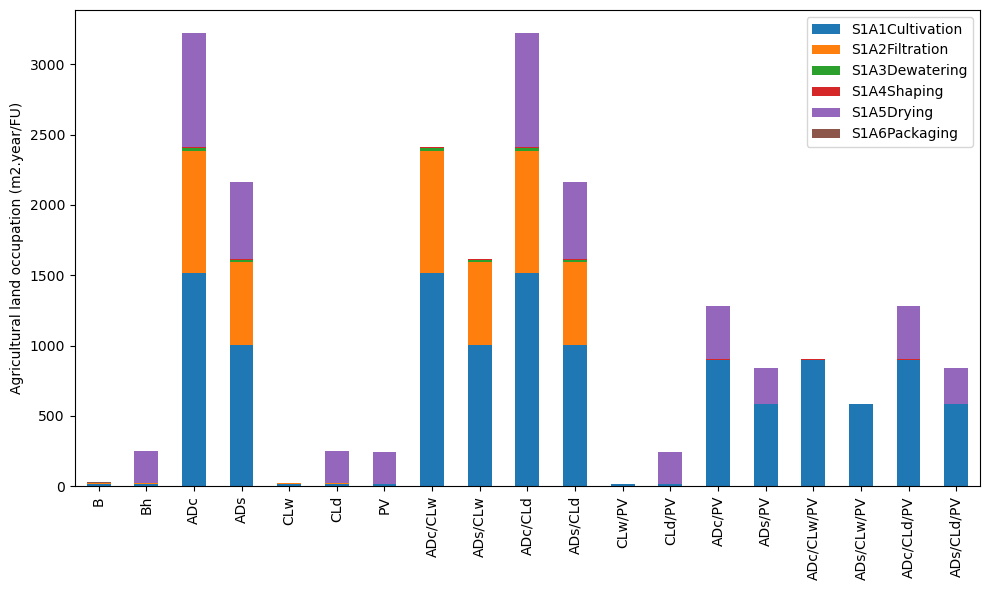

In [131]:
# Plotting stacked bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colors = ['#e6194b',  '#ffe119', '#3cb44b', '#4363d8', '#911eb4','#f58231']
ax = new_ALOP_df_S1.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Agricultural land occupation (m2.year/FU)')
#ax.set_title('Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(str(resdir+'/contribution_per_act_ALOP_S1.pdf'))
plt.show()

### Details of impacts per activity - S2

In [132]:
df_S2A1Maceration = alg.multiLCAAlgebric(S2A1Maceration_PARAM, 
                    impacts,
                    elec_S23 = list(df['elec_S23']),
                    )

In [133]:
df_S2A2Centrifugation = alg.multiLCAAlgebric(S2A2Centrifugation_PARAM, 
                    impacts,
                    elec_S23 = list(df['elec_S23']),
                    )

In [134]:
df_S2A3Filtration = alg.multiLCAAlgebric(S2A3Filtration_PARAM, impacts)

In [135]:
df_S2A4Ultrafiltration1 = alg.multiLCAAlgebric(S2A4Ultrafiltration1_PARAM, 
                        impacts,
                        elec_S23 = list(df['elec_S23']),
                        )

In [136]:
df_S2A5Ultrafiltration2 = alg.multiLCAAlgebric(S2A5Ultrafiltration2_PARAM, 
                        impacts,
                        elec_S23 = list(df['elec_S23']),
                        )

In [137]:
df_S2A6Concentration = alg.multiLCAAlgebric(S2A6Concentration_PARAM, 
                        impacts,
                        elec_S23 = list(df['elec_S23']),
                        )

In [138]:
df_S2A7aPackaging = alg.multiLCAAlgebric(S2A7aPackaging_PARAM, impacts)

In [139]:
df_S2A7bPackaging = alg.multiLCAAlgebric(S2A7bPackaging_PARAM, impacts)

In [140]:
df_S2A7cPackaging = alg.multiLCAAlgebric(S2A7cPackaging_PARAM, impacts)

In [141]:
# all columns except single values
df_S2_list = [df_S2A1Maceration,df_S2A2Centrifugation,df_S2A4Ultrafiltration1,df_S2A5Ultrafiltration2, df_S2A6Concentration]
GWP_cols_S2 = [df.iloc[:, 2] for df in df_S2_list]

# merge the columns except df_S1A6Packaging
GWP_cols_S2_df = pd.concat(GWP_cols_S2, axis=1, keys = ['S2A1Maceration','S2A2Centrifugation', 'S2A4Ultrafiltration1','S2A5Ultrafiltration2', 'S2A6Concentration'])

# add the value for df_S1A6Packaging, the same for all scenarios
GWP_cols_S2_df.insert(2, 'S2A3Filtration', df_S2A3Filtration.iloc[:, 2]['S2A3Filtration'])
GWP_cols_S2_df.insert(6,'S2A7aPackaging', df_S2A7aPackaging.iloc[:, 2]['S2A7aPackaging'])
GWP_cols_S2_df.insert(7,'S2A7bPackaging', df_S2A7bPackaging.iloc[:, 2]['S2A7bPackaging'])
GWP_cols_S2_df.insert(8,'S2A7cPackaging', df_S2A7cPackaging.iloc[:, 2]['S2A7cPackaging'])

In [142]:
# multiply all values except S2A1Maceration and S2A1Maceration by the adjustment factor for S2
new_GWP_df_S2 = pd.DataFrame()
for i in range(len(list(GWP_cols_S2_df.columns))): 
    if GWP_cols_S2_df.columns[i] == 'S2A1Maceration':
        new_GWP_df_S2[GWP_cols_S2_df.columns[i]] = GWP_cols_S2_df[GWP_cols_S2_df.columns[i]]
    if GWP_cols_S2_df.columns[i] == 'S2A2Centrifugation':
        new_GWP_df_S2[GWP_cols_S2_df.columns[i]] = GWP_cols_S2_df[GWP_cols_S2_df.columns[i]]
    new_GWP_df_S2[GWP_cols_S2_df.columns[i]] = GWP_cols_S2_df[GWP_cols_S2_df.columns[i]]*df_XS123['adjustment factor S2']

# Add name of the scenarios as index
new_GWP_df_S2.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)

new_GWP_df_S2.to_excel(str(resdir+'/contribution_per_act_S2_GWP.xlsx'))

In [143]:
new_GWP_df_S2

,S2A1Maceration,S2A2Centrifugation,S2A3Filtration,S2A4Ultrafiltration1,S2A5Ultrafiltration2,S2A6Concentration,S2A7aPackaging,S2A7bPackaging,S2A7cPackaging
B,0.748418,22.117560,20.113657,51.994097,13.759442,13.759442,15.583578,18.130694,24.855931
Bh,0.748418,22.117560,20.113657,51.994097,13.759442,13.759442,15.583578,18.130694,24.855931
ADc,0.748418,22.117560,20.113657,51.994097,13.759442,13.759442,15.583578,18.130694,24.855931
ADs,0.748418,22.117560,20.113657,51.994097,13.759442,13.759442,15.583578,18.130694,24.855931
CLw,4.896681,337.988508,114.388350,702.623222,135.080214,135.080214,88.625346,103.111045,141.358131
CLd,0.861016,59.430746,20.113657,123.546870,23.752044,23.752044,15.583578,18.130694,24.855931
PV,0.748418,22.117560,20.113657,51.994097,13.759442,13.759442,15.583578,18.130694,24.855931
ADc/CLw,5.590582,567.936055,114.388350,1143.576848,196.660972,196.660972,88.625346,103.111045,141.358131
ADs/CLw,5.590582,567.936055,114.388350,1143.576848,196.660972,196.660972,88.625346,103.111045,141.358131
ADc/CLd,0.983029,99.863938,20.113657,201.082652,34.580194,34.580194,15.583578,18.130694,24.855931


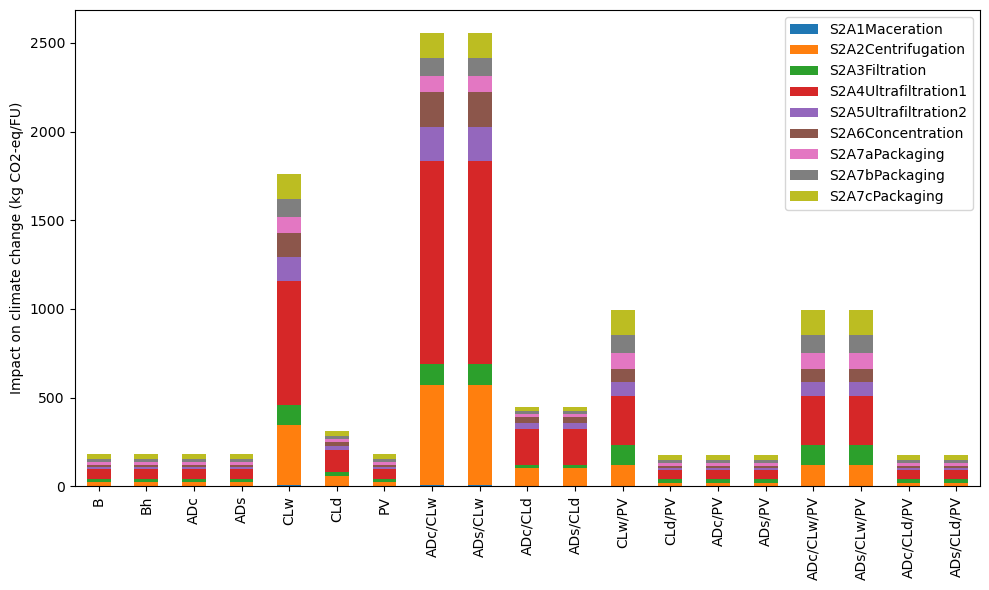

In [144]:
# Plotting stacked bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colors = ['#e6194b',  '#ffe119', '#3cb44b', '#4363d8', '#911eb4','#f58231']
ax = new_GWP_df_S2.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Impact on climate change (kg CO2-eq/FU)')
#ax.set_title('Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(str(resdir+'/contribution_per_act_GWP_S2.pdf'))
plt.show()

In [145]:
# all columns except single values
df_S2_list = [df_S2A1Maceration,df_S2A2Centrifugation,df_S2A4Ultrafiltration1,df_S2A5Ultrafiltration2, df_S2A6Concentration]
ALOP_cols_S2 = [df.iloc[:, 0] for df in df_S2_list]

# merge the columns except df_S1A6Packaging
ALOP_cols_S2_df = pd.concat(ALOP_cols_S2, axis=1, keys = ['S2A1Maceration','S2A2Centrifugation', 'S2A4Ultrafiltration1','S2A5Ultrafiltration2', 'S2A6Concentration'])

# add the value for df_S1A6Packaging, the same for all scenarios
ALOP_cols_S2_df.insert(2, 'S2A3Filtration', df_S2A3Filtration.iloc[:, 2]['S2A3Filtration'])
ALOP_cols_S2_df.insert(6,'S2A7aPackaging', df_S2A7aPackaging.iloc[:, 2]['S2A7aPackaging'])
ALOP_cols_S2_df.insert(7,'S2A7bPackaging', df_S2A7bPackaging.iloc[:, 2]['S2A7bPackaging'])
ALOP_cols_S2_df.insert(8,'S2A7cPackaging', df_S2A7cPackaging.iloc[:, 2]['S2A7cPackaging'])

# multiply all values except S2A1Maceration and S2A1Maceration by the adjustment factor for S2
new_ALOP_df_S2 = pd.DataFrame()
for i in range(len(list(ALOP_cols_S2_df.columns))): 
    if ALOP_cols_S2_df.columns[i] == 'S2A1Maceration':
        new_ALOP_df_S2[ALOP_cols_S2_df.columns[i]] = ALOP_cols_S2_df[ALOP_cols_S2_df.columns[i]]
    if ALOP_cols_S2_df.columns[i] == 'S2A2Centrifugation':
        new_ALOP_df_S2[ALOP_cols_S2_df.columns[i]] = ALOP_cols_S2_df[ALOP_cols_S2_df.columns[i]]
    new_ALOP_df_S2[ALOP_cols_S2_df.columns[i]] = ALOP_cols_S2_df[ALOP_cols_S2_df.columns[i]]*df_XS123['adjustment factor S2']

# Add name of the scenarios as index
new_ALOP_df_S2.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)

new_ALOP_df_S2.to_excel(str(resdir+'/contribution_per_act_S2_ALOP.xlsx'))

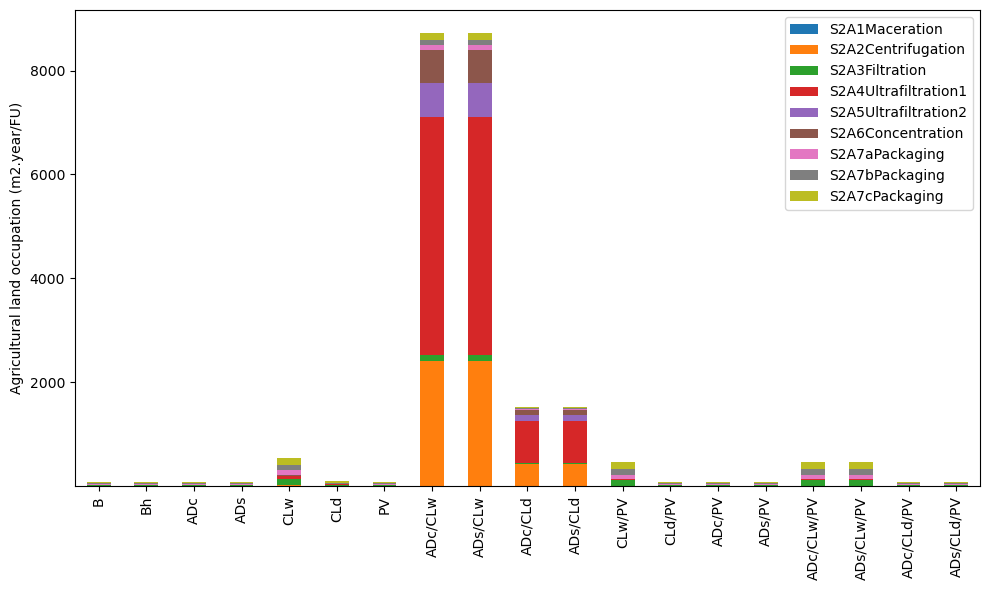

In [146]:
# Plotting stacked bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colors = ['#e6194b',  '#ffe119', '#3cb44b', '#4363d8', '#911eb4','#f58231']
ax = new_ALOP_df_S2.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Agricultural land occupation (m2.year/FU)')
#ax.set_title('Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(str(resdir+'/contribution_per_act_ALOP_S2.pdf'))
plt.show()

### Details of impacts per activity - S3

In [147]:
df_S3A1Extraction = alg.multiLCAAlgebric(S3A1Extraction_PARAM, 
                    impacts,
                    elec_S23 = list(df['elec_S23']),
                    )

In [148]:
df_S3A2Diafiltration = alg.multiLCAAlgebric(S3A2Diafiltration_PARAM, 
                    impacts,
                    elec_S23 = list(df['elec_S23']),
                    )

In [149]:
df_S3A3Ultrafiltration = alg.multiLCAAlgebric(S3A3Ultrafiltration_PARAM, 
                    impacts,
                    elec_S23 = list(df['elec_S23']),
                    )

In [150]:
df_S3A4Concentration = alg.multiLCAAlgebric(S3A4Concentration_PARAM, 
                    impacts,
                    elec_S23 = list(df['elec_S23']),
                    )

In [151]:
df_S3A5Packaging = alg.multiLCAAlgebric(S3A5Packaging_PARAM, impacts)

In [152]:
df_S3A6STabilisation = alg.multiLCAAlgebric(S3A6STabilisation_PARAM, impacts)

In [153]:
# all columns except single values
df_S3_list = [df_S3A1Extraction, df_S3A2Diafiltration, df_S3A3Ultrafiltration, df_S3A4Concentration]
GWP_cols_S3 = [df.iloc[:, 2] for df in df_S3_list]

# merge the columns except df_S1A6Packaging
GWP_cols_S3_df = pd.concat(GWP_cols_S3, axis=1, keys = ['S3A1Extraction','S3A2Diafiltration', 'S3A3Ultrafiltration','S3A4Concentration'])

# add the value for df_S1A6Packaging, the same for all scenarios
GWP_cols_S3_df.insert(4, 'S3A5Packaging', df_S3A5Packaging.iloc[:, 2]['S3A5Packaging'])
GWP_cols_S3_df.insert(5,'S3A6STabilisation', df_S3A6STabilisation.iloc[:, 2]['S3A6STabilisation'])

# multiply all the values by the adjustment factor for S3
new_GWP_df_S3 = pd.DataFrame()
for i in range(len(list(GWP_cols_S3_df.columns))): 
    new_GWP_df_S3[GWP_cols_S3_df.columns[i]] = GWP_cols_S3_df[GWP_cols_S3_df.columns[i]]*df_XS123['adjustment factor S3']

# Add name of the scenarios as index
new_GWP_df_S3.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)

new_GWP_df_S3.to_excel(str(resdir+'/contribution_per_act_S3_GWP.xlsx'))
new_GWP_df_S3.to_latex(str(resdir+'/contribution_per_act_S3_GWP.tex'))

In [154]:
new_GWP_df_S3

,S3A1Extraction,S3A2Diafiltration,S3A3Ultrafiltration,S3A4Concentration,S3A5Packaging,S3A6STabilisation
B,3.485168,2.995626,3.358338,17.286239,16.983575,2.800298
Bh,3.485168,2.995626,3.358338,17.286239,16.983575,2.800298
ADc,3.485168,2.995626,3.358338,17.286239,16.983575,2.800298
ADs,3.485168,2.995626,3.358338,17.286239,16.983575,2.800298
CLw,2.624727,1.520426,1.891019,15.112794,2.986334,0.492395
CLd,14.927079,8.646814,10.754411,85.947950,16.983575,2.800298
PV,3.485168,2.995626,3.358338,17.286239,16.983575,2.800298
ADc/CLw,4.804862,2.597200,3.300263,28.195560,2.986334,0.492395
ADs/CLw,4.804862,2.597200,3.300263,28.195560,2.986334,0.492395
ADc/CLd,27.325725,14.770535,18.768920,160.350929,16.983575,2.800298


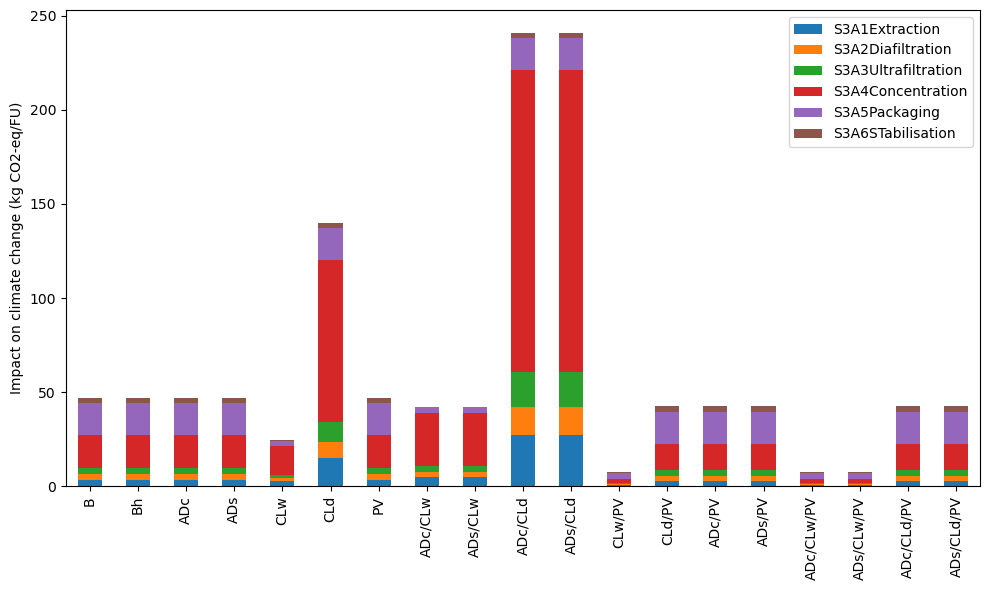

In [155]:
# Plotting stacked bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colors = ['#e6194b',  '#ffe119', '#3cb44b', '#4363d8', '#911eb4','#f58231']
ax = new_GWP_df_S3.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Impact on climate change (kg CO2-eq/FU)')
#ax.set_title('Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(str(resdir+'/contribution_per_act_GWP_S3.pdf'))
plt.show()

In [156]:
# all columns except single values
df_S3_list = [df_S3A1Extraction, df_S3A2Diafiltration, df_S3A3Ultrafiltration, df_S3A4Concentration]
ALOP_cols_S3 = [df.iloc[:, 0] for df in df_S3_list]

# merge the columns except df_S1A6Packaging
ALOP_cols_S3_df = pd.concat(ALOP_cols_S3, axis=1, keys = ['S3A1Extraction','S3A2Diafiltration', 'S3A3Ultrafiltration','S3A4Concentration'])

# add the value for df_S1A6Packaging, the same for all scenarios
ALOP_cols_S3_df.insert(4, 'S3A5Packaging', df_S3A5Packaging.iloc[:, 2]['S3A5Packaging'])
ALOP_cols_S3_df.insert(5,'S3A6STabilisation', df_S3A6STabilisation.iloc[:, 2]['S3A6STabilisation'])

# multiply all the values by the adjustment factor for S3
new_ALOP_df_S3 = pd.DataFrame()
for i in range(len(list(ALOP_cols_S3_df.columns))): 
    new_ALOP_df_S3[ALOP_cols_S3_df.columns[i]] = ALOP_cols_S3_df[ALOP_cols_S3_df.columns[i]]*df_XS123['adjustment factor S3']

# Add name of the scenarios as index
new_ALOP_df_S3.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)

new_ALOP_df_S3.to_excel(str(resdir+'/contribution_per_act_S3_ALOP.xlsx'))

In [157]:
new_ALOP_df_S3

,S3A1Extraction,S3A2Diafiltration,S3A3Ultrafiltration,S3A4Concentration,S3A5Packaging,S3A6STabilisation
B,0.462015,0.297979,0.354003,2.445467,16.983575,2.800298
Bh,0.462015,0.297979,0.354003,2.445467,16.983575,2.800298
ADc,0.462015,0.297979,0.354003,2.445467,16.983575,2.800298
ADs,0.462015,0.297979,0.354003,2.445467,16.983575,2.800298
CLw,0.251035,0.136258,0.172003,1.448930,2.986334,0.492395
CLd,1.427661,0.774914,0.978198,8.240207,16.983575,2.800298
PV,0.462015,0.297979,0.354003,2.445467,16.983575,2.800298
ADc/CLw,22.691375,11.219597,14.677483,136.111064,2.986334,0.492395
ADs/CLw,22.691375,11.219597,14.677483,136.111064,2.986334,0.492395
ADc/CLd,129.048085,63.806953,83.472289,774.077028,16.983575,2.800298


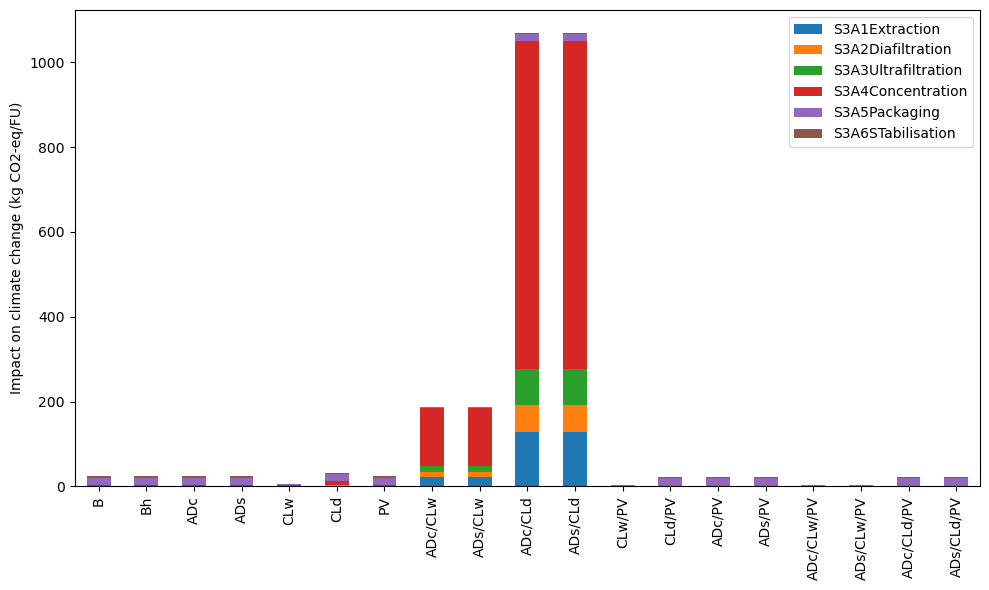

In [158]:
# Plotting stacked bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colors = ['#e6194b',  '#ffe119', '#3cb44b', '#4363d8', '#911eb4','#f58231']
ax = new_ALOP_df_S3.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Impact on climate change (kg CO2-eq/FU)')
#ax.set_title('Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(str(resdir+'/contribution_per_act_ALOP_S3.pdf'))
plt.show()

### Results per exchange for each activity in A1

In [159]:
df_S1A1Cultivation_PARAM = alg.exploreImpacts(GWP, S1A1Cultivation_PARAM)
df_S1A1Cultivation_PARAM.to_excel(str(resdir+'/S1A1Cultivation_PARAM.xlsx'))

Required param 'elec_S1_rest' was missing, replacing by default value : grid_IT
Required param 'N_source_S1' was missing, replacing by default value : N_no_burdens


In [160]:
df_S1A2Filtration_PARAM = alg.exploreImpacts(GWP, S1A2Filtration_PARAM)
df_S1A2Filtration_PARAM.to_excel(str(resdir+'/S1A2Filtration_PARAM.xlsx'))

Required param 'elec_S1_rest' was missing, replacing by default value : grid_IT


In [162]:
df_S1A3Dewatering_PARAM = alg.exploreImpacts(GWP, S1A3Dewatering_PARAM)
df_S1A3Dewatering_PARAM.to_excel(str(resdir+'/S1A3Dewatering_PARAM.xlsx'))

Required param 'elec_S1_rest' was missing, replacing by default value : grid_IT


In [163]:
df_S1A4Shaping_PARAM = alg.exploreImpacts(GWP, S1A4Shaping_PARAM)
df_S1A4Shaping_PARAM.to_excel(str(resdir+'/S1A4Shaping_PARAM.xlsx'))

Required param 'elec_S1_rest' was missing, replacing by default value : grid_IT


In [164]:
df_S1A5Drying_PARAM = alg.exploreImpacts(GWP, S1A5Drying_PARAM)
df_S1A5Drying_PARAM.to_excel(str(resdir+'/S1A5Drying_PARAM.xlsx'))

Required param 'elec_S1_drying' was missing, replacing by default value : grid_IT
Required param 'heat_S1_drying' was missing, replacing by default value : heat_CHP_no_burdens


In [165]:
df_S1A6Packaging_PARAM = alg.exploreImpacts(GWP, S1A6Packaging_PARAM)
df_S1A6Packaging_PARAM.to_excel(str(resdir+'/S1A6Packaging_PARAM.xlsx'))

## Sensitivity of Spirulina biomass productivity on GWP

In [166]:
list_prod_change = list(np.arange(-1,1,0.1))

In [167]:
import numpy as np

df_prod_change = alg.multiLCAAlgebric(model_S1234, 
                     impacts, 
                     # biomass productivity (depends on nutrient source)
                     productivity_change = list_prod_change,
                     # phycocyanin extraction efficiency (wet vs. dry line)
                     new_extraction_efficiency = [0.9216]*len(list_prod_change), 
                     # energy sources
                     elec_S1_operation = ['grid_IT']*len(list_prod_change),
                     elec_S1_drying = ['elec_CHP_no_burdens']*len(list_prod_change),
                     heat_S1_drying = ['heat_CHP_no_burdens']*len(list_prod_change),
                     #heat_Nrec = ['heat_CHP_no_burdens', 'heat_CHP_no_burdens', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_no_burdens', 'heat_CHP_no_burdens', 'heat_CHP_no_burdens', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_no_burdens', 'heat_CHP_no_burdens', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_alloc'],
                     elec_S1_rest = ['grid_IT']*len(list_prod_change),
                     elec_S23 = ['grid_FR']*len(list_prod_change),
                     # nutrient sources
                     use_KNO3 = [1]*len(list_prod_change),
                     N_source_S1 = ['N_no_burdens']*len(list_prod_change),
                     # transport distances
                     distance_car_S1 = [50]*len(list_prod_change),
                     distance_ferry_S12 = [800]*len(list_prod_change),
                     distance_lorry_S12 = [30]*len(list_prod_change),
                     distance_lorry_refr_S23 = [1020]*len(list_prod_change)
                     )

<lambdifygenerated-762>:2: RuntimeWarning: divide by zero encountered in divide
  return 0.00652181976009688*distance_car_S1 + 5.07168684476862e-5*distance_ferry_S12 + 0.001549455719049*distance_lorry_S12 + 0.001549455719049*distance_lorry_refr_S23 + 0.190271939939339*elec_S1_operation_PV_IT + 159.685631243059*elec_S1_operation_elec_CHP_alloc + 159.274809962255*elec_S1_operation_elec_CHP_subst + 1.69526106956146*elec_S1_operation_grid_IT + 0.502732146969497*elec_S23_PV_IT + 421.917705052024*elec_S23_elec_CHP_alloc + 420.83224250518*elec_S23_elec_CHP_subst + 1.32061189786039*elec_S23_grid_FR + 4.4791798383206*elec_S23_grid_IT + 1.08506944444444*new_extraction_efficiency*(1.25127488520541*elec_S23_PV_IT + 1050.13182693315*elec_S23_elec_CHP_alloc + 1047.43016555763*elec_S23_elec_CHP_subst + 3.28693621614856*elec_S23_grid_FR + 11.1484520570137*elec_S23_grid_IT + 1.02336481810326) + 1.15428918503957 + 6.8038*(0.310039434166721*elec_S1_drying_PV_IT + 260.200441383726*elec_S1_drying_elec_CHP_

In [168]:
df_prod_change

,agricultural land occupation - ALOP[square meter-year],ozone depletion - ODPinf[kg CFC-11-Eq],climate change - GWP100[kg CO2-Eq],terrestrial acidification - TAP100[kg SO2-Eq],photochemical oxidant formation - POFP[kg NMVOC-Eq],metal depletion - MDP[kg Fe-Eq],water depletion - WDP[m3 water-Eq],"freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]","human toxicity - HTPinf[kg 1,4-DCB-Eq]",urban land occupation - ULOP[square meter-year],particulate matter formation - PMFP[kg PM10-Eq],freshwater eutrophication - FEP[kg P-Eq],natural land transformation - NLTP[square meter],marine eutrophication - MEP[kg N-Eq],"terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]",fossil depletion - FDP[kg oil-Eq],ionising radiation - IRP_HE[kg U235-Eq],"marine ecotoxicity - METPinf[kg 1,4-DB-Eq]"
0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,-inf,inf,inf,inf,inf,inf
1,396.237244,0.000317,3147.845979,16.982503,9.242774,353.125227,46.643506,1.820508,332.767923,37.066782,5.285250,0.128789,-0.175410,1.120315,0.273810,871.861038,164.857650,4.351292
2,278.774244,0.000213,1784.197653,9.411099,5.563288,189.561843,26.672835,1.058043,197.010393,24.935319,3.054005,0.075515,-0.102459,0.732803,0.184679,514.904155,127.828711,2.628650
3,239.619910,0.000179,1329.648211,6.887298,4.336793,135.040715,20.015945,0.803889,151.757883,20.891498,2.310257,0.057757,-0.078142,0.603632,0.154969,395.918527,115.485732,2.054436
4,220.042744,0.000162,1102.373491,5.625397,3.723546,107.780152,16.687500,0.676811,129.131628,18.869588,1.938383,0.048878,-0.065983,0.539046,0.140114,336.425713,109.314242,1.767329
5,208.296444,0.000151,966.008658,4.868257,3.355597,91.423813,14.690432,0.600565,115.555875,17.656442,1.715259,0.043551,-0.058688,0.500295,0.131201,300.730025,105.611348,1.595065
6,200.465577,0.000144,875.098770,4.363496,3.110298,80.519588,13.359054,0.549734,106.505373,16.847677,1.566509,0.039999,-0.053825,0.474461,0.125259,276.932899,103.142752,1.480222
7,194.872101,0.000139,810.163135,4.002953,2.935084,72.730855,12.408070,0.513426,100.040728,16.269989,1.460259,0.037462,-0.050351,0.456008,0.121014,259.934953,101.379469,1.398191
8,190.676993,0.000136,761.461409,3.732546,2.803674,66.889306,11.694832,0.486195,95.192245,15.836722,1.380572,0.035560,-0.047745,0.442168,0.117831,247.186493,100.057007,1.336668
9,187.414132,0.000133,723.582289,3.522229,2.701466,62.345878,11.140091,0.465015,91.421202,15.499737,1.318593,0.034080,-0.045719,0.431404,0.115355,237.271024,99.028425,1.288817


In [169]:
# Selecting the first column of each DataFrame
x = list_prod_change # x-axis is the productivity change
y = df_prod_change.iloc[:, 2] # y-axis is the corresponding GWP

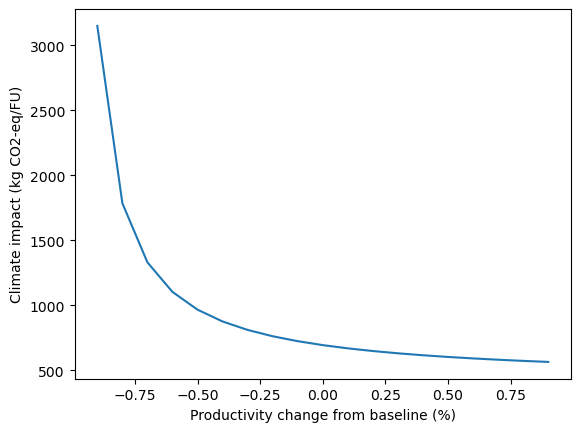

In [170]:
plt.plot(x, y)
plt.xlabel("Productivity change from baseline (%)")
plt.ylabel("Climate impact (kg CO2-eq/FU)")
plt.savefig(str(resdir+'/sensitivity_producitvity_change_GWP.pdf'))
plt.show()

## Sensitivity of PC extraction efficiency on GWP

In [171]:
import numpy as np

list_PC_extr_eff = list(np.arange(0,1,0.1))

df_PC_extr = alg.multiLCAAlgebric(model_S1234, 
                     impacts, 
                     # biomass productivity (depends on nutrient source)
                     productivity_change = [0]*len(list_PC_extr_eff),
                     # phycocyanin extraction efficiency (wet vs. dry line)
                     new_extraction_efficiency = list_PC_extr_eff, 
                     # energy sources
                     elec_S1_operation = ['grid_IT']*len(list_PC_extr_eff),
                     elec_S1_drying = ['elec_CHP_no_burdens']*len(list_PC_extr_eff),
                     heat_S1_drying = ['heat_CHP_no_burdens']*len(list_PC_extr_eff),
                     #heat_Nrec = ['heat_CHP_no_burdens', 'heat_CHP_no_burdens', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_no_burdens', 'heat_CHP_no_burdens', 'heat_CHP_no_burdens', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_no_burdens', 'heat_CHP_no_burdens', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_alloc', 'heat_CHP_alloc'],
                     elec_S1_rest = ['grid_IT']*len(list_PC_extr_eff),
                     elec_S23 = ['grid_FR']*len(list_PC_extr_eff),
                     # nutrient sources
                     use_KNO3 = [1]*len(list_PC_extr_eff),
                     N_source_S1 = ['N_no_burdens']*len(list_PC_extr_eff),
                     # transport distances
                     distance_car_S1 = [50]*len(list_PC_extr_eff),
                     distance_ferry_S12 = [800]*len(list_PC_extr_eff),
                     distance_lorry_S12 = [30]*len(list_PC_extr_eff),
                     distance_lorry_refr_S23 = [1020]*len(list_PC_extr_eff)
                     )

<lambdifygenerated-780>:2: RuntimeWarning: divide by zero encountered in divide
  return 0.00652181976009688*distance_car_S1 + 5.07168684476862e-5*distance_ferry_S12 + 0.001549455719049*distance_lorry_S12 + 0.001549455719049*distance_lorry_refr_S23 + 0.190271939939339*elec_S1_operation_PV_IT + 159.685631243059*elec_S1_operation_elec_CHP_alloc + 159.274809962255*elec_S1_operation_elec_CHP_subst + 1.69526106956146*elec_S1_operation_grid_IT + 0.502732146969497*elec_S23_PV_IT + 421.917705052024*elec_S23_elec_CHP_alloc + 420.83224250518*elec_S23_elec_CHP_subst + 1.32061189786039*elec_S23_grid_FR + 4.4791798383206*elec_S23_grid_IT + 1.08506944444444*new_extraction_efficiency*(1.25127488520541*elec_S23_PV_IT + 1050.13182693315*elec_S23_elec_CHP_alloc + 1047.43016555763*elec_S23_elec_CHP_subst + 3.28693621614856*elec_S23_grid_FR + 11.1484520570137*elec_S23_grid_IT + 1.02336481810326) + 1.15428918503957 + 6.8038*(0.310039434166721*elec_S1_drying_PV_IT + 260.200441383726*elec_S1_drying_elec_CHP_

In [172]:
df_PC_extr

,agricultural land occupation - ALOP[square meter-year],ozone depletion - ODPinf[kg CFC-11-Eq],climate change - GWP100[kg CO2-Eq],terrestrial acidification - TAP100[kg SO2-Eq],photochemical oxidant formation - POFP[kg NMVOC-Eq],metal depletion - MDP[kg Fe-Eq],water depletion - WDP[m3 water-Eq],"freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]","human toxicity - HTPinf[kg 1,4-DCB-Eq]",urban land occupation - ULOP[square meter-year],particulate matter formation - PMFP[kg PM10-Eq],freshwater eutrophication - FEP[kg P-Eq],natural land transformation - NLTP[square meter],marine eutrophication - MEP[kg N-Eq],"terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]",fossil depletion - FDP[kg oil-Eq],ionising radiation - IRP_HE[kg U235-Eq],"marine ecotoxicity - METPinf[kg 1,4-DB-Eq]"
0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,-inf,inf,inf,inf,inf,inf
1,1420.239570,0.000399,1838.157414,7.822492,6.236551,132.740960,39.523329,1.174875,200.735129,30.326951,3.155225,0.126622,-0.110956,1.818558,0.219450,654.371885,331.757739,2.678703
2,725.649509,0.000238,1177.679850,5.242431,4.154619,89.866774,22.800280,0.754470,135.706985,21.709695,2.067145,0.072645,-0.072439,1.016555,0.158520,407.981167,187.806514,1.852820
3,494.431287,0.000186,960.913980,4.396058,3.470508,75.825573,17.328520,0.616695,114.405414,18.865013,1.710029,0.054913,-0.059789,0.752764,0.138476,327.330586,142.217798,1.582123
4,379.056025,0.000162,855.076035,3.983108,3.135852,68.992619,14.669581,0.549578,104.035485,17.463474,1.535654,0.046243,-0.053605,0.623526,0.128652,288.115039,121.219710,1.450224
5,310.017947,0.000148,793.609259,3.743527,2.940979,65.042962,13.135771,0.510723,98.038214,16.639193,1.434375,0.041197,-0.050007,0.548110,0.122918,265.473505,110.057873,1.373844
6,264.148460,0.000140,754.328069,3.590630,2.815996,62.534955,12.164525,0.486000,94.227271,16.103541,1.369644,0.037963,-0.047703,0.499604,0.119228,251.118979,103.814162,1.325222
7,231.518169,0.000135,727.724355,3.487268,2.730951,60.850747,11.514745,0.469352,91.665659,15.732819,1.325798,0.035765,-0.046138,0.466476,0.116705,241.499885,100.380808,1.292464
8,207.162376,0.000132,709.044064,3.414863,2.670867,59.681414,11.065881,0.457751,89.884878,15.465179,1.295005,0.034214,-0.045034,0.442959,0.114913,234.840436,98.703927,1.269619
9,188.322913,0.000131,695.646055,3.363098,2.627424,58.855331,10.750960,0.449515,88.624652,15.266261,1.272913,0.033095,-0.044239,0.425849,0.113608,230.154084,98.198029,1.253384


In [173]:
# Selecting the first column of each DataFrame
x = list_PC_extr_eff # x-axis is the productivity change
y = df_PC_extr.iloc[:, 2] # y-axis is the corresponding GWP

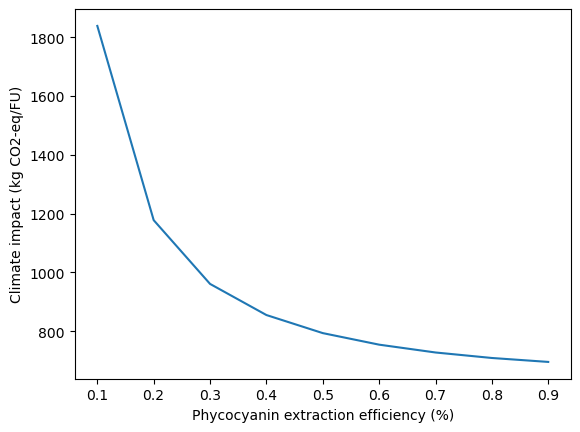

In [174]:
plt.plot(x, y)
plt.xlabel("Phycocyanin extraction efficiency (%)")
plt.ylabel("Climate impact (kg CO2-eq/FU)")
plt.savefig(str(resdir+'/sensitivity_PC_extr_eff_GWP.pdf'))
plt.show()

## Graph sensitivity analysis: allocation versus substitution

### LCA results obtained with substitution instead of allocation

In [176]:
# load the scenarios for substitution (the name of the parameters changes from "alloc" to "subst")
df_subst = pd.read_excel(r'/home/leabraud/Documents/LCASpiralg_AD/scenarios_subst.xlsx')
df_subst

,Abbreviation,productivity_change,new_extraction_efficiency,elec_S1_operation,elec_S1_drying,heat_S1_drying,heat_S4_Nrec,elec_S1_rest,elec_S23,use_KNO3,N_source_S1,distance_car_S1,distance_ferry_S12,distance_lorry_S12,distance_lorry_refr_S23
0,B,0.0000,0.921600,grid_IT,grid_IT,heat_CHP_no_burdens,heat_CHP_no_burdens,grid_IT,grid_FR,1,N_no_burdens,50,800,30,1020
1,Bh,0.0000,0.921600,grid_IT,grid_IT,heat_CHP_subst,heat_CHP_no_burdens,grid_IT,grid_FR,1,N_no_burdens,50,800,30,1020
2,ADc,-0.3992,0.921600,elec_CHP_subst,elec_CHP_subst,heat_CHP_subst,heat_CHP_subst,elec_CHP_subst,grid_FR,0,Ncitr_subst,50,800,30,1020
3,ADs,-0.1179,0.921600,elec_CHP_subst,elec_CHP_subst,heat_CHP_subst,heat_CHP_subst,elec_CHP_subst,grid_FR,0,Nsulf_subst,50,800,30,1020
4,CLw,0.0000,0.162051,grid_IT,elec_CHP_no_burdens,heat_CHP_no_burdens,heat_CHP_no_burdens,grid_IT,grid_IT,1,N_no_burdens,0,0,0,0
5,CLd,0.0000,0.921600,grid_IT,grid_IT,heat_CHP_subst,heat_CHP_no_burdens,grid_IT,grid_IT,1,N_no_burdens,0,0,0,0
6,PV,0.0000,0.921600,PV_IT,PV_IT,heat_CHP_subst,heat_CHP_no_burdens,PV_IT,grid_FR,1,N_no_burdens,50,800,30,1020
7,ADc/CLw,-0.3992,0.162051,elec_CHP_subst,elec_CHP_no_burdens,heat_CHP_no_burdens,heat_CHP_subst,elec_CHP_subst,elec_CHP_subst,0,Ncitr_subst,0,0,0,0
8,ADs/CLw,-0.1179,0.162051,elec_CHP_subst,elec_CHP_no_burdens,heat_CHP_no_burdens,heat_CHP_subst,elec_CHP_subst,elec_CHP_subst,0,Nsulf_subst,0,0,0,0
9,ADc/CLd,-0.3992,0.921600,elec_CHP_subst,elec_CHP_subst,heat_CHP_subst,heat_CHP_subst,elec_CHP_subst,elec_CHP_subst,0,Ncitr_subst,0,0,0,0


In [177]:
# all the alloc activities were remplaced by subst activities (electricity, heat, nitrogen)
df_scenarios_subst = alg.multiLCAAlgebric(model_S1234, 
                     impacts, 
                     
                     # biomass productivity (depends on nutrient source)
                     productivity_change = list(df_subst['productivity_change']),
                     
                     # phycocyanin extraction efficiency (wet vs. dry line)
                     new_extraction_efficiency = list(df_subst['new_extraction_efficiency']),
                     
                     # energy sources
                     elec_S1_operation = list(df_subst['elec_S1_operation']),
                     elec_S1_drying = list(df_subst['elec_S1_drying']),
                     heat_S1_drying = list(df_subst['heat_S1_drying']),
                     heat_S4_Nrec = list(df_subst['heat_S4_Nrec']),
                     elec_S1_rest = list(df_subst['elec_S1_rest']),
                     elec_S23 = list(df_subst['elec_S23']),
                                    
                     # nutrient sources
                     use_KNO3 = list(df_subst['use_KNO3']),
                     N_source_S1 = list(df_subst['N_source_S1']),

                     # transport distances
                     distance_car_S1 = list(df_subst['distance_car_S1']),
                     distance_ferry_S12 = list(df_subst['distance_ferry_S12']),
                     distance_lorry_S12 = list(df_subst['distance_lorry_S12']),
                     distance_lorry_refr_S23 = list(df_subst['distance_lorry_refr_S23'])
                    )

In [178]:
df_scenarios_subst

,agricultural land occupation - ALOP[square meter-year],ozone depletion - ODPinf[kg CFC-11-Eq],climate change - GWP100[kg CO2-Eq],terrestrial acidification - TAP100[kg SO2-Eq],photochemical oxidant formation - POFP[kg NMVOC-Eq],metal depletion - MDP[kg Fe-Eq],water depletion - WDP[m3 water-Eq],"freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]","human toxicity - HTPinf[kg 1,4-DCB-Eq]",urban land occupation - ULOP[square meter-year],particulate matter formation - PMFP[kg PM10-Eq],freshwater eutrophication - FEP[kg P-Eq],natural land transformation - NLTP[square meter],marine eutrophication - MEP[kg N-Eq],"terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]",fossil depletion - FDP[kg oil-Eq],ionising radiation - IRP_HE[kg U235-Eq],"marine ecotoxicity - METPinf[kg 1,4-DB-Eq]"
0,187.566201,1.340965e-04,722.059750,3.471366,2.685263,59.043873,11.003543,0.453106,89.546184,15.328389,1.303829,0.033803,-0.044862,0.425688,0.114187,240.156226,99.395793,1.262656
1,411.307425,1.305111e-04,729.648319,4.768637,2.696286,58.252580,10.100231,0.422344,86.062712,14.804765,1.462071,0.038053,-0.044148,0.607699,0.110057,228.757084,98.369210,1.221842
2,3522.280631,1.095578e-04,951.693624,22.389476,3.701837,69.324981,10.229936,0.568849,66.152838,11.879695,3.954138,0.121771,-0.044166,3.381190,0.634172,156.165010,100.325996,1.083029
3,2471.056416,9.396783e-05,658.995346,15.286054,2.675898,48.584071,3.576953,0.158823,53.328860,10.649818,2.744573,0.078245,-0.034185,2.222478,0.073602,116.964454,89.796448,0.841555
4,929.926494,1.956672e-04,1683.229574,7.221346,4.688614,88.389313,28.441675,0.782272,127.348931,15.098146,2.532215,0.099660,-0.079436,1.207660,0.112179,603.141995,57.418958,1.583050
5,427.215979,8.043541e-05,775.827800,4.836242,2.054288,47.735909,10.643215,0.314550,55.164519,5.285444,1.305709,0.043021,-0.034550,0.587356,0.041988,249.601826,24.916839,0.680139
6,398.784893,1.141917e-04,606.159217,4.321531,2.464756,67.155984,9.299513,0.424436,94.914125,14.510504,1.356724,0.035470,-0.042859,0.600202,0.151415,180.611240,93.221903,1.456396
7,9220.773312,7.696397e-05,2009.336592,55.074892,6.024874,83.179812,7.384117,0.208515,27.153841,-0.029679,8.731273,0.281485,-0.062929,8.197342,0.540251,226.979782,35.012014,0.494006
8,8426.065089,5.893335e-05,1739.221349,49.519399,5.049342,61.771409,-0.137108,-0.234020,10.994371,-1.804579,7.722245,0.243293,-0.052553,7.247719,-0.024592,179.698784,23.949162,0.212518
9,5897.997113,1.623869e-05,1054.640537,36.257526,3.228776,51.465266,1.217776,0.134620,-0.977214,-3.167034,5.495687,0.171689,-0.027268,5.281787,0.522607,42.445238,16.135705,0.112209


In [179]:
df_scenarios_subst_index = alg.multiLCAAlgebric(model_S1234, 
                     impacts, 
                     
                     # biomass productivity (depends on nutrient source)
                     productivity_change = list(df_subst['productivity_change']),
                     
                     # phycocyanin extraction efficiency (wet vs. dry line)
                     new_extraction_efficiency = list(df_subst['new_extraction_efficiency']),
                     
                     # energy sources
                     elec_S1_operation = list(df_subst['elec_S1_operation']),
                     elec_S1_drying = list(df_subst['elec_S1_drying']),
                     heat_S1_drying = list(df_subst['heat_S1_drying']),
                     heat_S4_Nrec = list(df_subst['heat_S4_Nrec']),
                     elec_S1_rest = list(df_subst['elec_S1_rest']),
                     elec_S23 = list(df_subst['elec_S23']),
                                    
                     # nutrient sources
                     use_KNO3 = list(df_subst['use_KNO3']),
                     N_source_S1 = list(df_subst['N_source_S1']),

                     # transport distances
                     distance_car_S1 = list(df_subst['distance_car_S1']),
                     distance_ferry_S12 = list(df_subst['distance_ferry_S12']),
                     distance_lorry_S12 = list(df_subst['distance_lorry_S12']),
                     distance_lorry_refr_S23 = list(df_subst['distance_lorry_refr_S23'])
                    )

df_scenarios_subst_index.insert(0, 'Abbreviations', list(df_subst['Abbreviation']), True)
df_scenarios_subst_index.set_index('Abbreviations')
df_scenarios_subst_index.to_excel(str(resdir+'/aggregated_LCA_results_subst.xlsx'))

### LCA results obtained for the different allocation strategies

Average values of the allocation factors for biogas:
- alloc_biogas_total_100%: 0.730270
- alloc_biogas_total_50%: 0.836411
- alloc_biogas_total_10%: 0.959750
- alloc_biogas_total_0%: 1.000000

In [180]:
alloc_biogas_100 = 0.730270
alloc_biogas_50 = 0.836411
alloc_biogas_10 = 0.959750
alloc_biogas_0 = 1

In [181]:
# Update the activities with the 100% allocation factor

model_elec_CHP_alloc_100 = [act for act in bw.Database(db_param) if 'model_elec_CHP_alloc' in act['name']][0]
model_elec_CHP_alloc_100.updateExchanges({'S4A1BiogasAD' : model_elec_CHP_alloc_100.getAmount('S4A1BiogasAD') * (alloc_biogas_100 / alloc_biogas_50)})

model_heat_CHP_alloc_100 = [act for act in bw.Database(db_param) if 'model_heat_CHP_alloc' in act['name']][0]
model_heat_CHP_alloc_100.updateExchanges({'S4A1BiogasAD' : model_elec_CHP_alloc_100.getAmount('S4A1BiogasAD') * (alloc_biogas_100 / alloc_biogas_50)})

model_Ncitr_alloc_100 = [act for act in bw.Database(db_param) if 'model_Ncitr_alloc' in act['name']][0]
model_Ncitr_alloc_100.updateExchanges({'S4A1DigestateAD' : model_Ncitr_alloc_100.getAmount('S4A1DigestateAD') * ((1 - alloc_biogas_100) / (1 - alloc_biogas_50))})

model_Nsulf_alloc_100 = [act for act in bw.Database(db_param) if 'model_Nsulf_alloc' in act['name']][0]
model_Nsulf_alloc_100.updateExchanges({'S4A1DigestateAD' : model_Nsulf_alloc_100.getAmount('S4A1DigestateAD') * ((1 - alloc_biogas_100) / (1 - alloc_biogas_50))})


In [182]:
df_scenarios_alloc100 = alg.multiLCAAlgebric(model_S1234, 
                     impacts, 
                     
                     # biomass productivity (depends on nutrient source)
                     productivity_change = list(df['productivity_change']),
                     
                     # phycocyanin extraction efficiency (wet vs. dry line)
                     new_extraction_efficiency = list(df['new_extraction_efficiency']),
                     
                     # energy sources
                     elec_S1_operation = list(df['elec_S1_operation']),
                     elec_S1_drying = list(df['elec_S1_drying']),
                     heat_S1_drying = list(df['heat_S1_drying']),
                     heat_S4_Nrec = list(df['heat_S4_Nrec']),
                     elec_S1_rest = list(df['elec_S1_rest']),
                     elec_S23 = list(df['elec_S23']),
                                    
                     # nutrient sources
                     use_KNO3 = list(df['use_KNO3']),
                     N_source_S1 = list(df['N_source_S1']),

                     # transport distances
                     distance_car_S1 = list(df['distance_car_S1']),
                     distance_ferry_S12 = list(df['distance_ferry_S12']),
                     distance_lorry_S12 = list(df['distance_lorry_S12']),
                     distance_lorry_refr_S23 = list(df['distance_lorry_refr_S23'])
                    )

df_scenarios_alloc100

,agricultural land occupation - ALOP[square meter-year],ozone depletion - ODPinf[kg CFC-11-Eq],climate change - GWP100[kg CO2-Eq],terrestrial acidification - TAP100[kg SO2-Eq],photochemical oxidant formation - POFP[kg NMVOC-Eq],metal depletion - MDP[kg Fe-Eq],water depletion - WDP[m3 water-Eq],"freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]","human toxicity - HTPinf[kg 1,4-DCB-Eq]",urban land occupation - ULOP[square meter-year],particulate matter formation - PMFP[kg PM10-Eq],freshwater eutrophication - FEP[kg P-Eq],natural land transformation - NLTP[square meter],marine eutrophication - MEP[kg N-Eq],"terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]",fossil depletion - FDP[kg oil-Eq],ionising radiation - IRP_HE[kg U235-Eq],"marine ecotoxicity - METPinf[kg 1,4-DB-Eq]"
0,187.566201,0.000134,722.059750,3.471366,2.685263,59.043873,11.003543,0.453106,89.546184,15.328389,1.303829,0.033803,-0.044862,0.425688,0.114187,240.156226,99.395793,1.262656
1,419.914039,0.000136,855.574885,7.092692,2.821979,60.842598,11.081351,0.460223,90.205301,15.747152,1.807813,0.039309,-0.045634,0.693737,0.114259,244.830731,99.980902,1.283196
2,3549.835998,0.000154,1402.006760,27.046709,4.537151,93.727419,19.789565,0.968591,102.617968,20.913971,4.910807,0.130653,-0.055072,3.549759,0.676150,297.699192,111.980345,1.675392
3,2489.900801,0.000125,968.541462,18.458579,3.253939,65.636623,10.246066,0.438384,78.757362,16.961480,3.401074,0.084382,-0.041752,2.337329,0.102923,215.090839,97.851048,1.255283
4,929.926494,0.000196,1683.229574,7.221346,4.688614,88.389313,28.441675,0.782272,127.348931,15.098146,2.532215,0.099660,-0.079436,1.207660,0.112179,603.141995,57.418958,1.583050
5,435.822592,0.000086,901.754367,7.160297,2.179981,50.325927,11.624335,0.352429,59.307107,6.227830,1.651450,0.044277,-0.036036,0.673394,0.046190,265.675472,26.528532,0.741493
6,407.391507,0.000119,732.085784,6.645586,2.590450,69.746002,10.280633,0.462315,99.056713,15.452891,1.702466,0.036726,-0.044344,0.686241,0.155617,196.684886,94.833596,1.517750
7,9242.104351,0.000166,2550.978939,55.914193,7.617020,149.095360,32.073506,1.319062,119.522576,24.237896,9.633566,0.297553,-0.086097,8.226818,0.652665,524.968082,56.373202,2.073500
8,8443.460572,0.000138,2214.631426,50.108863,6.475633,122.883482,22.611133,0.796238,96.130996,20.670190,8.521211,0.257519,-0.073547,7.269252,0.079376,447.495378,42.882851,1.673795
9,5929.138840,0.000084,1638.177130,40.937043,4.491766,96.154459,18.198452,0.876954,63.289520,13.305584,6.683049,0.184677,-0.044697,5.452177,0.598864,265.087314,33.274969,1.186794


In [183]:
# Update the activities with the 10% allocation factor

model_elec_CHP_alloc_100 = [act for act in bw.Database(db_param) if 'model_elec_CHP_alloc' in act['name']][0]
model_elec_CHP_alloc_100.updateExchanges({'S4A1BiogasAD' : model_elec_CHP_alloc_100.getAmount('S4A1BiogasAD') * (alloc_biogas_10 / alloc_biogas_50)})

model_heat_CHP_alloc_100 = [act for act in bw.Database(db_param) if 'model_heat_CHP_alloc' in act['name']][0]
model_heat_CHP_alloc_100.updateExchanges({'S4A1BiogasAD' : model_elec_CHP_alloc_100.getAmount('S4A1BiogasAD') * (alloc_biogas_10 / alloc_biogas_50)})

model_Ncitr_alloc_100 = [act for act in bw.Database(db_param) if 'model_Ncitr_alloc' in act['name']][0]
model_Ncitr_alloc_100.updateExchanges({'S4A1DigestateAD' : model_Ncitr_alloc_100.getAmount('S4A1DigestateAD') * ((1 - alloc_biogas_10) / (1 - alloc_biogas_50))})

model_Nsulf_alloc_100 = [act for act in bw.Database(db_param) if 'model_Nsulf_alloc' in act['name']][0]
model_Nsulf_alloc_100.updateExchanges({'S4A1DigestateAD' : model_Nsulf_alloc_100.getAmount('S4A1DigestateAD') * ((1 - alloc_biogas_10) / (1 - alloc_biogas_50))})


In [184]:
df_scenarios_alloc10 = alg.multiLCAAlgebric(model_S1234, 
                     impacts, 
                     
                     # biomass productivity (depends on nutrient source)
                     productivity_change = list(df['productivity_change']),
                     
                     # phycocyanin extraction efficiency (wet vs. dry line)
                     new_extraction_efficiency = list(df['new_extraction_efficiency']),
                     
                     # energy sources
                     elec_S1_operation = list(df['elec_S1_operation']),
                     elec_S1_drying = list(df['elec_S1_drying']),
                     heat_S1_drying = list(df['heat_S1_drying']),
                     heat_S4_Nrec = list(df['heat_S4_Nrec']),
                     elec_S1_rest = list(df['elec_S1_rest']),
                     elec_S23 = list(df['elec_S23']),
                                    
                     # nutrient sources
                     use_KNO3 = list(df['use_KNO3']),
                     N_source_S1 = list(df['N_source_S1']),

                     # transport distances
                     distance_car_S1 = list(df['distance_car_S1']),
                     distance_ferry_S12 = list(df['distance_ferry_S12']),
                     distance_lorry_S12 = list(df['distance_lorry_S12']),
                     distance_lorry_refr_S23 = list(df['distance_lorry_refr_S23'])
                    )

df_scenarios_alloc10

,agricultural land occupation - ALOP[square meter-year],ozone depletion - ODPinf[kg CFC-11-Eq],climate change - GWP100[kg CO2-Eq],terrestrial acidification - TAP100[kg SO2-Eq],photochemical oxidant formation - POFP[kg NMVOC-Eq],metal depletion - MDP[kg Fe-Eq],water depletion - WDP[m3 water-Eq],"freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]","human toxicity - HTPinf[kg 1,4-DCB-Eq]",urban land occupation - ULOP[square meter-year],particulate matter formation - PMFP[kg PM10-Eq],freshwater eutrophication - FEP[kg P-Eq],natural land transformation - NLTP[square meter],marine eutrophication - MEP[kg N-Eq],"terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]",fossil depletion - FDP[kg oil-Eq],ionising radiation - IRP_HE[kg U235-Eq],"marine ecotoxicity - METPinf[kg 1,4-DB-Eq]"
0,187.566201,0.000134,722.059750,3.471366,2.685263,59.043873,11.003543,0.453106,89.546184,15.328389,1.303829,0.033803,-0.044862,0.425688,0.114187,240.156226,99.395793,1.262656
1,423.742990,0.000136,915.069477,8.544263,2.842884,61.097575,11.090406,0.461121,90.555795,15.847805,2.000191,0.039361,-0.045787,0.748243,0.114433,245.087037,100.018513,1.286874
2,3556.851577,0.000154,1511.015458,29.706342,4.575455,94.194600,19.806156,0.970238,103.260160,21.098393,5.263291,0.130749,-0.055353,3.649627,0.676468,298.168808,112.049257,1.682131
3,2494.734560,0.000125,1043.648850,20.291076,3.280330,65.958512,10.257497,0.439519,79.199834,17.088547,3.643937,0.084448,-0.041945,2.406139,0.103143,215.414406,97.898529,1.259927
4,929.926494,0.000196,1683.229574,7.221346,4.688614,88.389313,28.441675,0.782272,127.348931,15.098146,2.532215,0.099660,-0.079436,1.207660,0.112179,603.141995,57.418958,1.583050
5,439.651544,0.000086,961.248959,8.611868,2.200887,50.580904,11.633390,0.353327,59.657601,6.328483,1.843828,0.044329,-0.036189,0.727900,0.046364,265.931779,26.566143,0.745171
6,411.220458,0.000120,791.580376,8.097156,2.611355,70.000979,10.289688,0.463214,99.407207,15.553544,1.894844,0.036778,-0.044498,0.740746,0.155790,196.941193,94.871206,1.521428
7,9248.627012,0.000166,2652.328629,58.386959,7.652632,149.529716,32.088931,1.320593,120.119647,24.409361,9.961284,0.297642,-0.086358,8.319669,0.652961,525.404703,56.437273,2.079766
8,8449.984127,0.000139,2315.995005,52.581968,6.511250,123.317897,22.626561,0.797770,96.728149,20.841678,8.848974,0.257608,-0.073808,7.362116,0.079672,447.932058,42.946931,1.680061
9,5938.757628,0.000085,1787.634713,44.583563,4.544282,96.794992,18.221199,0.879212,64.170004,13.558438,7.166325,0.184809,-0.045082,5.589102,0.599301,265.731187,33.369452,1.196034


In [185]:
# Update the activities with the 0% allocation factor

model_elec_CHP_alloc_0 = [act for act in bw.Database(db_param) if 'model_elec_CHP_alloc' in act['name']][0]
model_elec_CHP_alloc_0.updateExchanges({'S4A1BiogasAD' : model_elec_CHP_alloc_0.getAmount('S4A1BiogasAD') * (alloc_biogas_0 / alloc_biogas_50)})

model_heat_CHP_alloc_0 = [act for act in bw.Database(db_param) if 'model_heat_CHP_alloc' in act['name']][0]
model_heat_CHP_alloc_0.updateExchanges({'S4A1BiogasAD' : model_heat_CHP_alloc_0.getAmount('S4A1BiogasAD') * (alloc_biogas_0 / alloc_biogas_50)})

model_Ncitr_alloc_0 = [act for act in bw.Database(db_param) if 'model_Ncitr_alloc' in act['name']][0]
model_Ncitr_alloc_0.updateExchanges({'S4A1DigestateAD' : model_Ncitr_alloc_0.getAmount('S4A1DigestateAD') * ((1 - alloc_biogas_0) / (1 - alloc_biogas_50))})

model_Nsulf_alloc_0 = [act for act in bw.Database(db_param) if 'model_Nsulf_alloc' in act['name']][0]
model_Nsulf_alloc_0.updateExchanges({'S4A1DigestateAD' : model_Nsulf_alloc_0.getAmount('S4A1DigestateAD') * ((1 - alloc_biogas_0) / (1 - alloc_biogas_50))})


In [186]:
df_scenarios_alloc0 = alg.multiLCAAlgebric(model_S1234, 
                     impacts, 
                     
                     # biomass productivity (depends on nutrient source)
                     productivity_change = list(df['productivity_change']),
                     
                     # phycocyanin extraction efficiency (wet vs. dry line)
                     new_extraction_efficiency = list(df['new_extraction_efficiency']),
                     
                     # energy sources
                     elec_S1_operation = list(df['elec_S1_operation']),
                     elec_S1_drying = list(df['elec_S1_drying']),
                     heat_S1_drying = list(df['heat_S1_drying']),
                     heat_S4_Nrec = list(df['heat_S4_Nrec']),
                     elec_S1_rest = list(df['elec_S1_rest']),
                     elec_S23 = list(df['elec_S23']),
                                    
                     # nutrient sources
                     use_KNO3 = list(df['use_KNO3']),
                     N_source_S1 = list(df['N_source_S1']),

                     # transport distances
                     distance_car_S1 = list(df['distance_car_S1']),
                     distance_ferry_S12 = list(df['distance_ferry_S12']),
                     distance_lorry_S12 = list(df['distance_lorry_S12']),
                     distance_lorry_refr_S23 = list(df['distance_lorry_refr_S23'])
                    )

df_scenarios_alloc0

,agricultural land occupation - ALOP[square meter-year],ozone depletion - ODPinf[kg CFC-11-Eq],climate change - GWP100[kg CO2-Eq],terrestrial acidification - TAP100[kg SO2-Eq],photochemical oxidant formation - POFP[kg NMVOC-Eq],metal depletion - MDP[kg Fe-Eq],water depletion - WDP[m3 water-Eq],"freshwater ecotoxicity - FETPinf[kg 1,4-DCB-Eq]","human toxicity - HTPinf[kg 1,4-DCB-Eq]",urban land occupation - ULOP[square meter-year],particulate matter formation - PMFP[kg PM10-Eq],freshwater eutrophication - FEP[kg P-Eq],natural land transformation - NLTP[square meter],marine eutrophication - MEP[kg N-Eq],"terrestrial ecotoxicity - TETPinf[kg 1,4-DCB-Eq]",fossil depletion - FDP[kg oil-Eq],ionising radiation - IRP_HE[kg U235-Eq],"marine ecotoxicity - METPinf[kg 1,4-DB-Eq]"
0,187.566201,0.000134,722.059750,3.471366,2.685263,59.043873,11.003543,0.453106,89.546184,15.328389,1.303829,0.033803,-0.044862,0.425688,0.114187,240.156226,99.395793,1.262656
1,425.965936,0.000136,949.609804,9.386990,2.855021,61.245605,11.095663,0.461643,90.759279,15.906241,2.111878,0.039392,-0.045876,0.779887,0.114534,245.235839,100.040349,1.289009
2,3563.501462,0.000155,1614.341967,32.227340,4.611761,94.637428,19.821882,0.971799,103.868877,21.273201,5.597401,0.130840,-0.055619,3.744289,0.676770,298.613945,112.114578,1.688519
3,2499.348177,0.000125,1115.335645,22.040116,3.305519,66.265741,10.268407,0.440602,79.622155,17.209827,3.875739,0.084511,-0.042129,2.471814,0.103353,215.723237,97.943847,1.264359
4,929.926494,0.000196,1683.229574,7.221346,4.688614,88.389313,28.441675,0.782272,127.348931,15.098146,2.532215,0.099660,-0.079436,1.207660,0.112179,603.141995,57.418958,1.583050
5,441.874489,0.000086,995.789285,9.454595,2.213023,50.728934,11.638647,0.353849,59.861085,6.386919,1.955516,0.044359,-0.036278,0.759544,0.046465,266.080581,26.587978,0.747307
6,413.443404,0.000120,826.120702,8.939884,2.623492,70.149009,10.294945,0.463735,99.610691,15.611979,2.006531,0.036808,-0.044587,0.772390,0.155891,197.089995,94.893042,1.523563
7,9260.526075,0.000167,2837.217329,62.897941,7.717598,150.322097,32.117071,1.323386,121.208863,24.722157,10.559129,0.297805,-0.086834,8.489055,0.653501,526.201215,56.554155,2.091197
8,8461.255654,0.000140,2491.133008,56.855048,6.572789,124.068489,22.653216,0.800415,97.759921,21.137978,9.415289,0.257762,-0.074259,7.522568,0.080184,448.686564,43.057648,1.690889
9,5949.369390,0.000086,1952.521221,48.606524,4.602220,97.501649,18.246295,0.881703,65.141383,13.837394,7.699492,0.184954,-0.045506,5.740162,0.599783,266.441528,33.473689,1.206228


In [187]:
df_scenarios_alloc100.to_excel(str(resdir+'/aggregated_allocation100.xlsx'))
df_scenarios_alloc10.to_excel(str(resdir+'/aggregated_allocation10.xlsx'))
df_scenarios_alloc0.to_excel(str(resdir+'/aggregated_allocation0.xlsx'))

### Plot the comparison graph GWP

In [188]:
df_sensitivity_list = [df_scenarios_alloc100, df_scenarios, df_scenarios_alloc10, df_scenarios_alloc0, df_scenarios_subst]

In [189]:
# Selecting the first column of each DataFrame
GWP_cols_sensitivity = [df.iloc[:, 2] for df in df_sensitivity_list]

# Creating a new DataFrame with the first columns
GWP_cols_df_sensitivity = pd.concat(GWP_cols_sensitivity, axis=1, keys = ['allocation 100%',
                                                                          'allocation 50%', 
                                                                          'allocation 10%',
                                                                          'allocation 0%',
                                                                          'substitution'])
#GWP_cols_df_sensitivity.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)
GWP_cols_df_sensitivity.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)

GWP_cols_df_sensitivity

,allocation 100%,allocation 50%,allocation 10%,allocation 0%,substitution
B,722.059750,722.059750,722.059750,722.059750,722.059750
Bh,855.574885,768.259220,915.069477,949.609804,729.648319
ADc,1402.006760,1278.399109,1511.015458,1614.341967,951.693624
ADs,968.541462,885.201041,1043.648850,1115.335645,658.995346
CLw,1683.229574,1683.229574,1683.229574,1683.229574,1683.229574
CLd,901.754367,814.438702,961.248959,995.789285,775.827800
PV,732.085784,644.770119,791.580376,826.120702,606.159217
ADc/CLw,2550.978939,2662.758353,2652.328629,2837.217329,2009.336592
ADs/CLw,2214.631426,2322.634444,2315.995005,2491.133008,1739.221349
ADc/CLd,1638.177130,1554.437582,1787.634713,1952.521221,1054.640537


In [190]:
GWP_cols_df_sensitivity.to_excel(str(resdir+'/sensitivity_GWP.xlsx'))

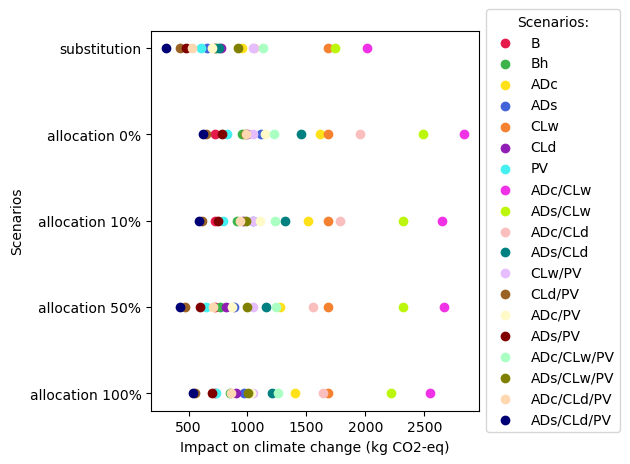

In [191]:
colors =  ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000001'] 

# Create a scatter plot for each row
i = 0
for index, row in GWP_cols_df_sensitivity.iterrows():
    plt.scatter(row, GWP_cols_df_sensitivity.columns, label=index, color=colors[i])
    i+=1

# Add labels and legend
plt.xlabel('Impact on climate change (kg CO2-eq)')
plt.ylabel('Scenarios')
plt.xticks(fontsize=10)
#plt.title('Title')
plt.legend(title='Scenarios:', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Show the plot
plt.xticks(rotation=0)
plt.savefig(str(resdir+'/sensitivity_all_scenarios_GWP.pdf'),format='pdf')
plt.show()

In [192]:
transposed_df = GWP_cols_df_sensitivity.T
transposed_df

,B,Bh,ADc,ADs,CLw,CLd,PV,ADc/CLw,ADs/CLw,ADc/CLd,ADs/CLd,CLw/PV,CLd/PV,ADc/PV,ADs/PV,ADc/CLw/PV,ADs/CLw/PV,ADc/CLd/PV,ADs/CLd/PV
allocation 100%,722.05975,855.574885,1402.006760,968.541462,1683.229574,901.754367,732.085784,2550.978939,2214.631426,1638.177130,1204.711833,1046.241996,556.012770,1028.920905,702.422719,1256.841335,1003.651877,862.978344,536.480157
allocation 50%,722.05975,768.259220,1278.399109,885.201041,1683.229574,814.438702,644.770119,2662.758353,2322.634444,1554.437582,1161.239514,1046.241996,468.697105,870.211797,594.325641,1243.464559,994.540929,704.269235,428.383079
allocation 10%,722.05975,915.069477,1511.015458,1043.648850,1683.229574,961.248959,791.580376,2652.328629,2315.995005,1787.634713,1320.268104,1046.241996,615.507362,1102.316805,752.412806,1231.211615,986.195426,936.374243,586.470244
allocation 0%,722.05975,949.609804,1614.341967,1115.335645,1683.229574,995.789285,826.120702,2837.217329,2491.133008,1952.521221,1453.514899,1046.241996,650.047688,1151.443452,785.873060,1222.847706,980.498751,985.500890,619.930498
substitution,722.05975,729.648319,951.693624,658.995346,1683.229574,775.827800,606.159217,2009.336592,1739.221349,1054.640537,761.942258,1046.241996,430.086203,695.902978,475.603571,1133.421555,919.590428,529.960416,309.661009


In [193]:
GWP_cols_df_sensitivity.columns

Index(['allocation 100%', 'allocation 50%', 'allocation 10%', 'allocation 0%',
       'substitution'],
      dtype='object')

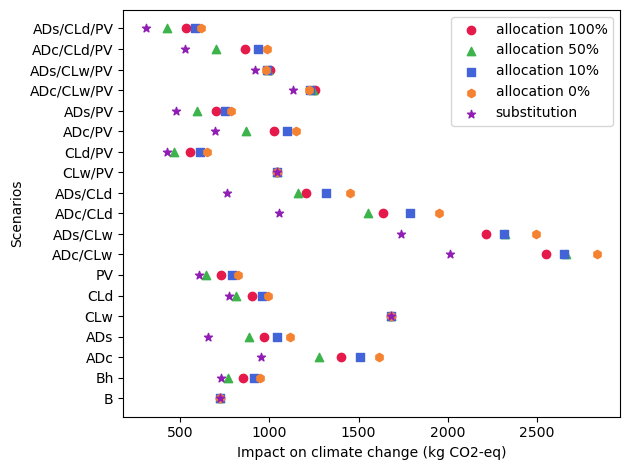

In [194]:
colors =  ['#e6194b', '#3cb44b', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000001'] 
markers = ["o","^","s","h","*" ]
# Create a scatter plot for each row
i = 0
for index, row in transposed_df.iterrows():
    plt.scatter(row, transposed_df.columns,label=index, color=colors[i], marker= markers[i] )
    i+=1

# Add labels and legend
plt.xlabel('Impact on climate change (kg CO2-eq)')
plt.ylabel('Scenarios')
plt.xticks(fontsize=10)
#plt.title('Title')
plt.legend(loc='best')
plt.tight_layout()
# Show the plot
plt.xticks(rotation=0)
plt.savefig(str(resdir+'/sensitivity_all_scenarios_GWP.pdf'),format='pdf')
plt.show()

In [195]:
GWP_cols_df_sensitivity_plot2 = GWP_cols_df_sensitivity.loc[['B','Bh', 'ADc', 'ADs', 'CLw', 'CLd', 'PV']]
GWP_cols_df_sensitivity_plot2

,allocation 100%,allocation 50%,allocation 10%,allocation 0%,substitution
B,722.059750,722.059750,722.059750,722.059750,722.059750
Bh,855.574885,768.259220,915.069477,949.609804,729.648319
ADc,1402.006760,1278.399109,1511.015458,1614.341967,951.693624
ADs,968.541462,885.201041,1043.648850,1115.335645,658.995346
CLw,1683.229574,1683.229574,1683.229574,1683.229574,1683.229574
CLd,901.754367,814.438702,961.248959,995.789285,775.827800
PV,732.085784,644.770119,791.580376,826.120702,606.159217


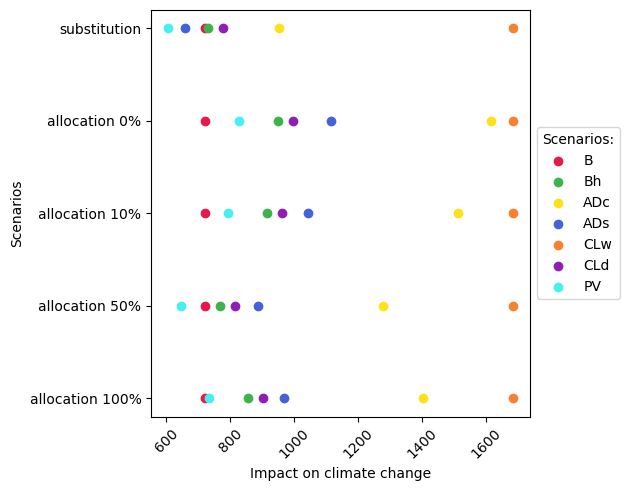

In [196]:
colors =  ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000001'] 

# Create a scatter plot for each row
i = 0
for index, row in GWP_cols_df_sensitivity_plot2.iterrows():
    plt.scatter(row, GWP_cols_df_sensitivity_plot2.columns, label=index, color=colors[i])
    i+=1

# Add labels and legend
plt.xlabel('Impact on climate change')
plt.ylabel('Scenarios')
#plt.title('Title')
plt.legend(title='Scenarios:', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Show the plot
plt.xticks(rotation=45)
plt.savefig(str(resdir+'/sensitivity_single_scenarios.pdf'))
plt.show()

### Plot the comparison graph ALOP

In [197]:
# Selecting the first column of each DataFrame
ALOP_cols_sensitivity = [df.iloc[:, 0] for df in df_sensitivity_list]

# Creating a new DataFrame with the first columns
ALOP_cols_df_sensitivity = pd.concat(ALOP_cols_sensitivity, axis=1, keys = ['allocation 100%',
                                                                          'allocation 50%', 
                                                                          'allocation 10%',
                                                                          'allocation 0%',
                                                                          'substitution'])
#GWP_cols_df_sensitivity.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)
ALOP_cols_df_sensitivity.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)

ALOP_cols_df_sensitivity

,allocation 100%,allocation 50%,allocation 10%,allocation 0%,substitution
B,187.566201,187.566201,187.566201,187.566201,187.566201
Bh,419.914039,414.294579,423.742990,425.965936,411.307425
ADc,3549.835998,3541.880860,3556.851577,3563.501462,3522.280631
ADs,2489.900801,2484.537180,2494.734560,2499.348177,2471.056416
CLw,929.926494,929.926494,929.926494,929.926494,929.926494
CLd,435.822592,430.203133,439.651544,441.874489,427.215979
PV,407.391507,401.772047,411.220458,413.443404,398.784893
ADc/CLw,9242.104351,9249.298248,9248.627012,9260.526075,9220.773312
ADs/CLw,8443.460572,8450.411428,8449.984127,8461.255654,8426.065089
ADc/CLd,5929.138840,5923.749532,5938.757628,5949.369390,5897.997113


In [198]:
ALOP_cols_df_sensitivity.to_excel(str(resdir+'/sensitivity_ALOP.xlsx'))

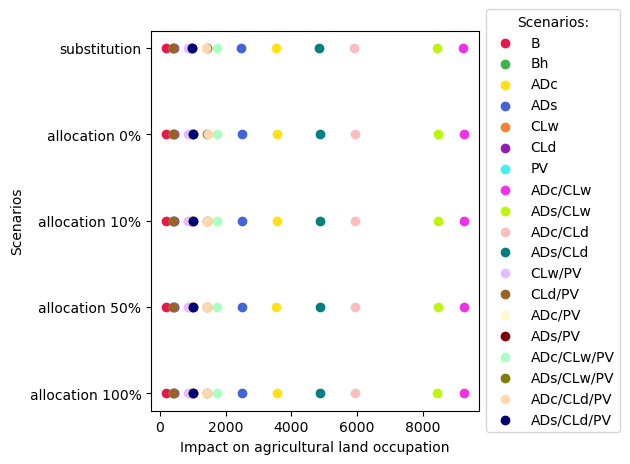

In [199]:
colors =  ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000001'] 

# Create a scatter plot for each row
i = 0
for index, row in ALOP_cols_df_sensitivity.iterrows():
    plt.scatter(row, ALOP_cols_df_sensitivity.columns, label=index, color=colors[i])
    i+=1

# Add labels and legend
plt.xlabel('Impact on agricultural land occupation')
plt.ylabel('Scenarios')
plt.xticks(fontsize=10)
#plt.title('Title')
plt.legend(title='Scenarios:', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Show the plot
plt.xticks(rotation=0)
plt.savefig(str(resdir+'/sensitivity_all_scenarios_ALOP.pdf'),format='pdf')
plt.show()

### Graph comparison substitution versus alloc 50 for the AD scenarios

In [ ]:
# calculate the impacts for the subsystems in the case of substitution

In [200]:
df_model_S1_dryline_subst = alg.multiLCAAlgebric(normalised_S1_dryline_model, 
                         impacts, 

                         # biomass productivity (depends on nutrient source
                         productivity_change = list(df_subst['productivity_change']),

                         # energy sources
                         elec_S1_operation = list(df_subst['elec_S1_operation']),
                         elec_S1_drying = list(df_subst['elec_S1_drying']),
                         heat_S1_drying = list(df_subst['heat_S1_drying']),
                         heat_S4_Nrec = list(df_subst['heat_S4_Nrec']),
                         elec_S1_rest = list(df_subst['elec_S1_rest']),

                         # nutrient sources
                         use_KNO3 = list(df_subst['use_KNO3']),
                         N_source_S1 = list(df_subst['N_source_S1'])
                         )

In [201]:
df_model_S2_subst = alg.multiLCAAlgebric(model_S2, 
                     impacts, 

                     # phycocyanin extraction efficiency (wet vs. dry line)
                     new_extraction_efficiency = list(df_subst['new_extraction_efficiency']),

                     # energy sources                     
                     elec_S23 = list(df_subst['elec_S23']),
                    )

In [202]:
df_model_S3_subst = alg.multiLCAAlgebric(model_S3, 
                     impacts, 
                     elec_S23 = list(df_subst['elec_S23']),
                     )

In [203]:
df_model_infrastructures_subst = alg.multiLCAAlgebric(model_infrastructures, 
                                 impacts, 

                                 # energy sources
                                 elec_S1_operation = list(df_subst['elec_S1_operation']),
                                )

In [204]:
df_model_operation_sust = alg.multiLCAAlgebric(model_operation, 
                     impacts, 

                     # energy sources
                     elec_S1_operation = list(df_subst['elec_S1_operation'])
                    )

In [205]:
df_model_transport_subst = alg.multiLCAAlgebric(model_transport, 
                     impacts, 

                     # transport distances
                     distance_car_S1 = list(df_subst['distance_car_S1']),
                     distance_ferry_S12 = list(df_subst['distance_ferry_S12']),
                     distance_lorry_S12 = list(df_subst['distance_lorry_S12']),
                     distance_lorry_refr_S23 = list(df_subst['distance_lorry_refr_S23'])
                    )

In [206]:
df_list_subst = [df_model_infrastructures_subst, 
                 df_model_operation_sust, 
                 df_model_S1_dryline_subst, 
                 df_model_S2_subst, 
                 df_model_S3_subst, 
                 df_model_transport_subst]

In [207]:
# Selecting the first column of each DataFrame
GWP_cols_subst = [df.iloc[:, 2] for df in df_list_subst]

# Creating a new DataFrame with the first columns
GWP_cols_df_subst = pd.concat(GWP_cols_subst, axis=1, keys = ['infrastructures','operation', 'S1','S2','S3','transport'])
GWP_cols_df_subst.set_index(pd.Index(list(df['Abbreviation'])), inplace=True)
GWP_cols_df_subst

,infrastructures,operation,S1,S2,S3,transport
B,18.929162,21.464982,301.510422,167.303379,46.909243,132.811603
Bh,18.929162,21.464982,309.098991,167.303379,46.909243,132.811603
ADc,18.929162,25.255709,527.353570,167.303379,46.909243,132.811603
ADs,18.929162,25.255709,234.655292,167.303379,46.909243,132.811603
CLw,18.929162,21.464982,272.729665,1345.478070,140.060127,0.000000
CLd,18.929162,21.464982,309.098991,286.274538,140.060127,0.000000
PV,18.929162,6.623754,200.451117,167.303379,46.909243,132.811603
ADc/CLw,18.929162,25.255709,456.537729,1479.602911,164.988872,0.000000
ADs/CLw,18.929162,25.255709,186.422487,1479.602911,164.988872,0.000000
ADc/CLd,18.929162,25.255709,527.353570,318.113224,164.988872,0.000000


In [208]:
GWP_cols_df_subst.to_excel(str(resdir+'/contribution_GWP_subst.xlsx'))

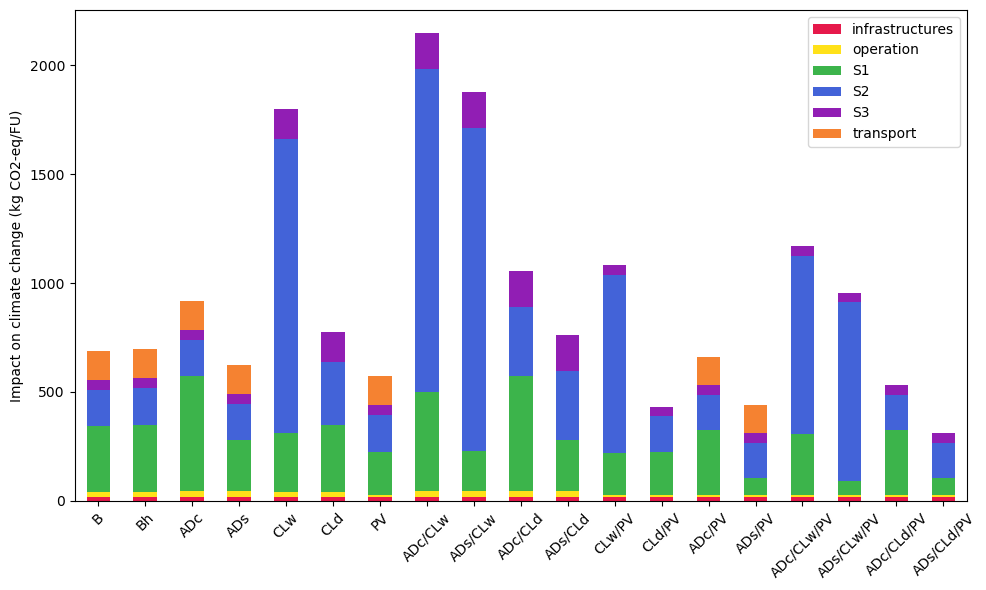

In [209]:
# Plotting stacked bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = ['#e6194b',  '#ffe119', '#3cb44b', '#4363d8', '#911eb4','#f58231']
ax = GWP_cols_df_subst.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Impact on climate change (kg CO2-eq/FU)')
#ax.set_title('Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(str(resdir+'/contribution_analysis_GWP_subst.pdf'))
plt.show()

In [210]:
# plot the values for 50 and substitution on the same graph, for AD scenarios only

AD_rows_subst = GWP_cols_df_subst.loc[['B', 'Bh', 'ADc', 'ADs', 'ADc/PV', 'ADs/PV','ADc/CLd/PV', 'ADs/CLd/PV']]
AD_rows_50 = GWP_cols_df.loc[['B', 'Bh', 'ADc', 'ADs', 'ADc/PV', 'ADs/PV','ADc/CLd/PV', 'ADs/CLd/PV']]

In [211]:
AD_rows_50

,infrastructures,operation,S1,S2,S3,transport
B,18.929162,21.464982,301.510422,167.303379,46.909243,132.811603
Bh,18.929162,21.464982,347.709893,167.303379,46.909243,132.811603
ADc,18.929162,36.814145,842.500618,167.303379,46.909243,132.811603
ADs,18.929162,36.814145,449.302550,167.303379,46.909243,132.811603
ADc/PV,18.929162,6.623754,474.634150,161.621595,42.460575,132.811603
ADs/PV,18.929162,6.623754,198.747994,161.621595,42.460575,132.811603
ADc/CLd/PV,18.929162,6.623754,474.634150,161.621595,42.460575,0.000000
ADs/CLd/PV,18.929162,6.623754,198.747994,161.621595,42.460575,0.000000


In [212]:
new_df_AD_rows_subst = AD_rows_subst.set_index([['B*', 'Bh*', 'ADc*', 'ADs*', 'ADc/PV*', 'ADs/PV*','ADc/CLd/PV*', 'ADs/CLd/PV*']])

In [213]:
new_df_AD_rows_subst

,infrastructures,operation,S1,S2,S3,transport
B*,18.929162,21.464982,301.510422,167.303379,46.909243,132.811603
Bh*,18.929162,21.464982,309.098991,167.303379,46.909243,132.811603
ADc*,18.929162,25.255709,527.353570,167.303379,46.909243,132.811603
ADs*,18.929162,25.255709,234.655292,167.303379,46.909243,132.811603
ADc/PV*,18.929162,6.623754,300.325331,161.621595,42.460575,132.811603
ADs/PV*,18.929162,6.623754,80.025923,161.621595,42.460575,132.811603
ADc/CLd/PV*,18.929162,6.623754,300.325331,161.621595,42.460575,0.000000
ADs/CLd/PV*,18.929162,6.623754,80.025923,161.621595,42.460575,0.000000


In [214]:
combined_df = pd.concat([AD_rows_50, new_df_AD_rows_subst], ignore_index=False)
combined_df

,infrastructures,operation,S1,S2,S3,transport
B,18.929162,21.464982,301.510422,167.303379,46.909243,132.811603
Bh,18.929162,21.464982,347.709893,167.303379,46.909243,132.811603
ADc,18.929162,36.814145,842.500618,167.303379,46.909243,132.811603
ADs,18.929162,36.814145,449.302550,167.303379,46.909243,132.811603
ADc/PV,18.929162,6.623754,474.634150,161.621595,42.460575,132.811603
ADs/PV,18.929162,6.623754,198.747994,161.621595,42.460575,132.811603
ADc/CLd/PV,18.929162,6.623754,474.634150,161.621595,42.460575,0.000000
ADs/CLd/PV,18.929162,6.623754,198.747994,161.621595,42.460575,0.000000
B*,18.929162,21.464982,301.510422,167.303379,46.909243,132.811603
Bh*,18.929162,21.464982,309.098991,167.303379,46.909243,132.811603


In [215]:
combined_df_plot = combined_df.reindex(index=['B', 'B*', 'Bh', 'Bh*','ADc', 'ADc*', 'ADs', 'ADs*', 'ADc/PV', 'ADc/PV*',
                              'ADs/PV', 'ADs/PV*','ADc/CLd/PV', 'ADc/CLd/PV*','ADs/CLd/PV','ADs/CLd/PV*'])

In [216]:
combined_df_plot

,infrastructures,operation,S1,S2,S3,transport
B,18.929162,21.464982,301.510422,167.303379,46.909243,132.811603
B*,18.929162,21.464982,301.510422,167.303379,46.909243,132.811603
Bh,18.929162,21.464982,347.709893,167.303379,46.909243,132.811603
Bh*,18.929162,21.464982,309.098991,167.303379,46.909243,132.811603
ADc,18.929162,36.814145,842.500618,167.303379,46.909243,132.811603
ADc*,18.929162,25.255709,527.353570,167.303379,46.909243,132.811603
ADs,18.929162,36.814145,449.302550,167.303379,46.909243,132.811603
ADs*,18.929162,25.255709,234.655292,167.303379,46.909243,132.811603
ADc/PV,18.929162,6.623754,474.634150,161.621595,42.460575,132.811603
ADc/PV*,18.929162,6.623754,300.325331,161.621595,42.460575,132.811603


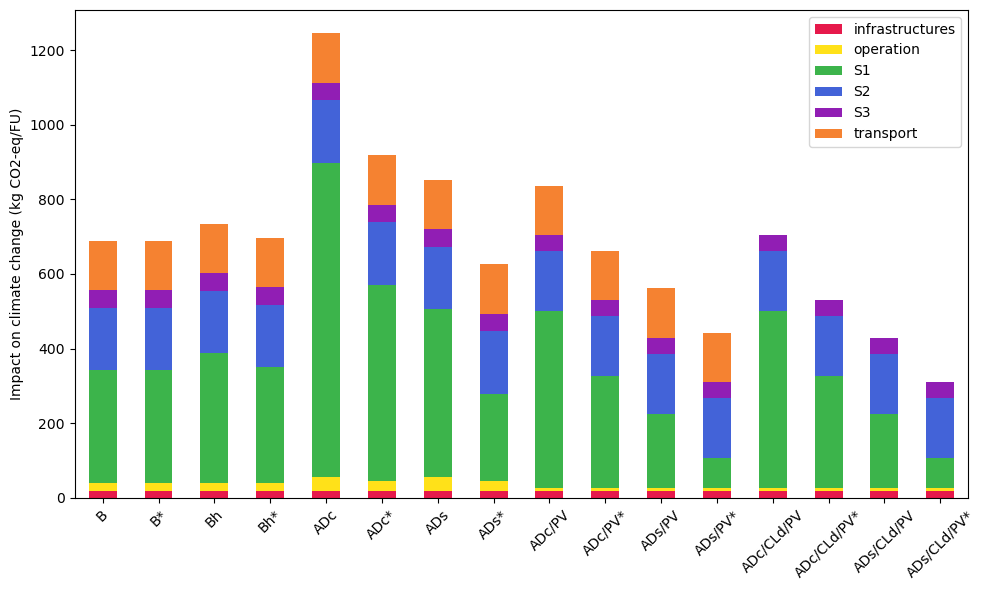

In [217]:
# Plotting stacked bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = ['#e6194b',  '#ffe119', '#3cb44b', '#4363d8', '#911eb4','#f58231']
ax = combined_df_plot.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Impact on climate change (kg CO2-eq/FU)')
#ax.set_title('Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(str(resdir+'/contribution_analysis_GWP_subst_50vsSubst.pdf'))
plt.show()